# Plots

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
import numpy as np

In [2]:
# Data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Germination_Forastero': [51.00, 57.33, 50.66, 61.33, 74.66, 65.33, 72.33],
    'Germination_Criollo': [49.66, 53.33, 49.33, 62.00, 70.66, 64.00, 69.33],
    'Vigour_Index_Forastero': [634.85, 739.97, 572.61, 880.05, 1241.04, 895.08, 1135.13],
    'Vigour_Index_Criolla': [732.16, 818.92, 791.09, 1032.24, 1259.60, 1082.60, 1212.44]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

In [5]:
pietext = sns.color_palette('cubehelix')[-1]
pietext = colors[-3]

In [4]:
# Set the style
sns.set(style="whitegrid")
colors = sns.color_palette("deep")
germination_colors = [colors[2], colors[3]]
vigor_colors = [colors[-1], colors[-4]]
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## HRT vs Methane yield

In [46]:
hrt_m3 = {'Treatments': ['T1','T2','T3','T4','T5','T6'],
          'HRT (days)': [20, 24, 15, 17, 19, 22],
          'CH4 yield (m3)':[0.35,0.28,0.40,0.44,0.39,0.36] 
         }
df_hm = pd.DataFrame(hrt_m3)
df_hm 

,Treatments,HRT (days),CH4 yield (m3)
0,T1,20,0.35
1,T2,24,0.28
2,T3,15,0.40
3,T4,17,0.44
4,T5,19,0.39
5,T6,22,0.36


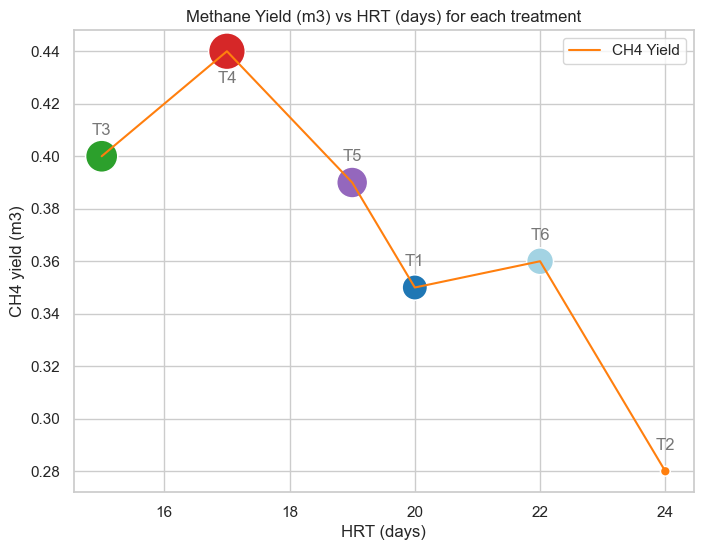

In [93]:
# Initialize the plot with lineplot
plt.figure(figsize=(8, 6))
ax = sns.lineplot(data=df_hm, x='HRT (days)', y='CH4 yield (m3)', color='#ff7f0e', label='CH4 Yield')

# Overlay scatter plot with relplot-style marker size and color by Treatment
sns.scatterplot(
    data=df_hm,
    x='HRT (days)', 
    y='CH4 yield (m3)', 
    hue='Treatments',      # Color by Treatments
    size='CH4 yield (m3)', # Size by CH4 yield
    sizes=(50, 700),       # Set min and max sizes for points
    ax=ax,
    legend=False,
    size_norm=None, #markeredgewidth=1
)

# Add text labels for each point
for i in range(df_hm.shape[0]):
    ax.text(
        x=df_hm['HRT (days)'][i], 
        y=df_hm['CH4 yield (m3)'][i]+0.007 if i != 3 else df_hm['CH4 yield (m3)'][i]-0.013, 
        s=df_hm['Treatments'][i],
        color="#777777",
        ha='center', 
        va='bottom'
    )
    
#plt.legend(loc='upper left')
plt.title("Methane Yield (m3) vs HRT (days) for each treatment")
plt.savefig('hrt_yield.png', dpi=303)
plt.show()

## Gas content Plot

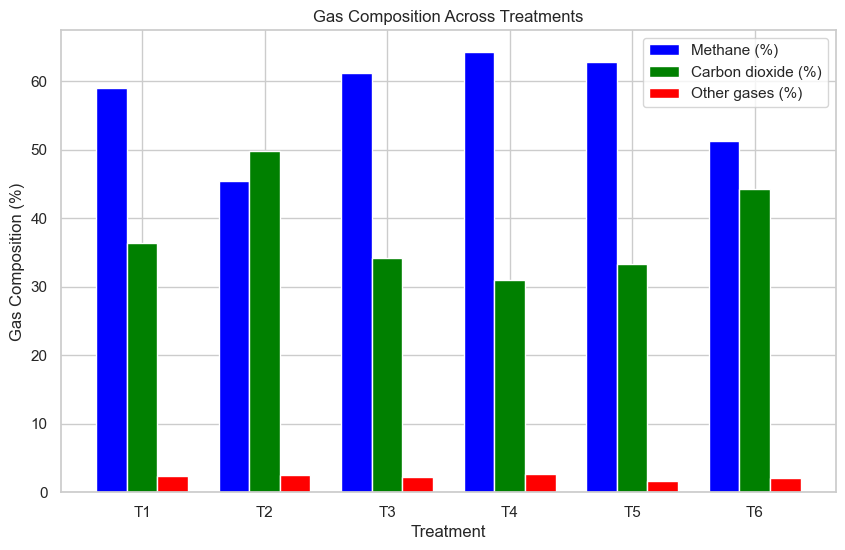

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Treatment': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Methane (%)': [59.00, 45.36, 61.19, 64.20, 62.71, 51.32],
    'Carbon dioxide (%)': [36.38, 49.76, 34.21, 31.00, 33.37, 44.27],
    'Other gases (%)': [2.42, 2.57, 2.29, 2.60, 1.62, 2.11]
}

# Creating DataFrame
df = pd.DataFrame(data)

# Set the width of each bar and the positions
bar_width = 0.25
r1 = np.arange(len(df['Treatment']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(r1, df['Methane (%)'], color='blue', width=bar_width, label='Methane (%)')
plt.bar(r2, df['Carbon dioxide (%)'], color='green', width=bar_width, label='Carbon dioxide (%)')
plt.bar(r3, df['Other gases (%)'], color='red', width=bar_width, label='Other gases (%)')

# Adding labels and title
plt.xlabel('Treatment')
plt.ylabel('Gas Composition (%)')
plt.title('Gas Composition Across Treatments')
plt.xticks([r + bar_width for r in range(len(df['Treatment']))], df['Treatment'])
plt.legend()
plt.savefig('gas_composition_across_treatments.png', dpi=303)
# Show plot
plt.show()

## Correlation Matrix for Bioslurry Composition Parameters

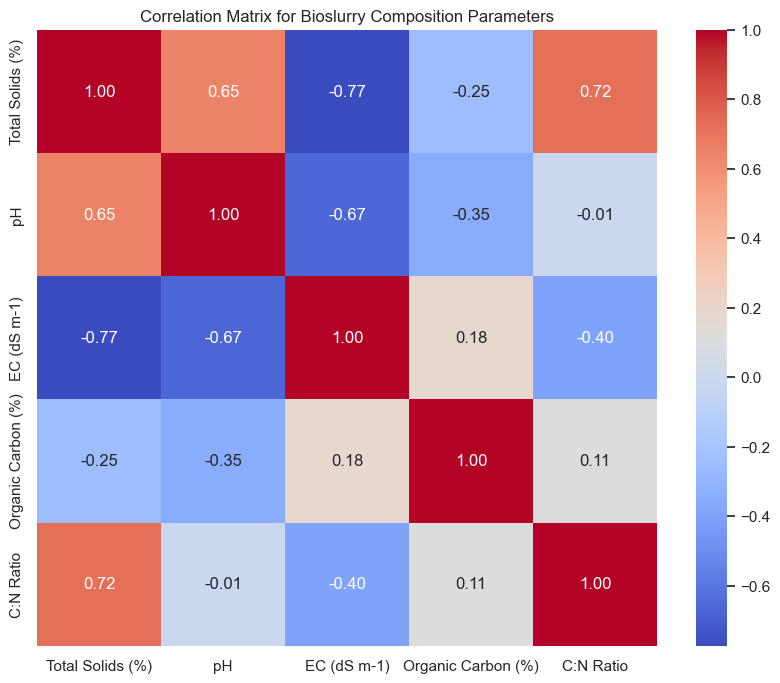

In [114]:
import seaborn as sns

# Composition data
composition_data = {
    "Total Solids (%)": [6.55, 4.42, 3.99, 3.30, 2.10, 2.27],
    "pH": [8.0, 6.4, 7.1, 7.1, 6.9, 6.8],
    "EC (dS m-1)": [0.51, 0.70, 0.56, 0.79, 0.73, 0.73],
    "Organic Carbon (%)": [24.36, 27.09, 20.54, 19.84, 28.83, 26.48],
    "C:N Ratio": [20.58, 25.55, 16.04, 13.84, 13.46, 10.26]
}

df_composition = pd.DataFrame(composition_data)

# Calculate correlation matrix
correlation_matrix = df_composition.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix for Bioslurry Composition Parameters")
plt.savefig('correlation_matrix_bioslurry.png', dpi=300)
plt.show()

/tmp/ipykernel_21278/4150245127.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="Treatment", y="Slurry Produced (ml)", palette=colors)


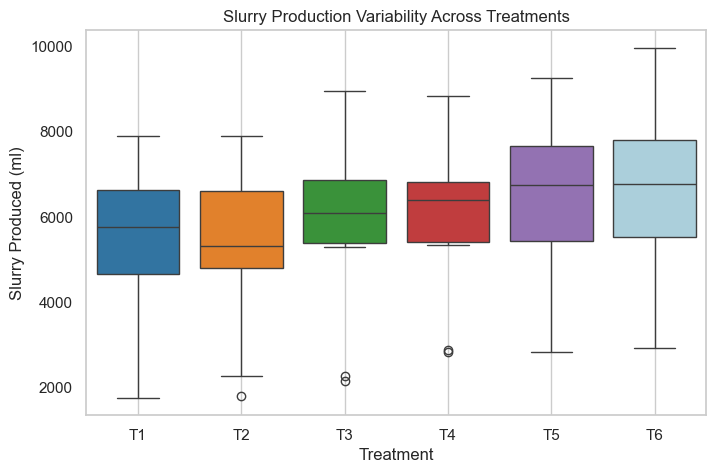

In [110]:
# Slurry production data
df = {
    "Interval (days)": ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50"],
    "T1": [1750, 2155, 4455, 6651, 7895, 6650, 6551, 6250, 5280, 5234],
    "T2": [1799, 2255, 4731, 4957, 7895, 6820, 6720, 6270, 5330, 5280],
    "T3": [2155, 2255, 5895, 8568, 8955, 6880, 6819, 6289, 5680, 5290],
    "T4": [2814, 2878, 6149, 8677, 8845, 6820, 6809, 6649, 5680, 5329],
    "T5": [2825, 2845, 6840, 9255, 9258, 7924, 6880, 6677, 5690, 5344],
    "T6": [2914, 2975, 7851, 9961, 9975, 7645, 6855, 6681, 5940, 5388]
}
df = pd.DataFrame(df)

# Transform data for box plot format
df_long = df.melt(id_vars=["Interval (days)"], var_name="Treatment", value_name="Slurry Produced (ml)")

# Plot box plot for each treatment
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_long, x="Treatment", y="Slurry Produced (ml)", palette=colors)

plt.title("Slurry Production Variability Across Treatments")
plt.xlabel("Treatment")
plt.ylabel("Slurry Produced (ml)")
plt.grid()
plt.savefig('slurry_produced_across_treatments.png', dpi=300)
plt.show()

In [106]:
df_long

,Interval (days),Treatment,Slurry Produced (ml)
0,1-5,T1,1750
1,6-10,T1,2155
2,11-15,T1,4455
3,16-20,T1,6651
4,21-25,T1,7895
5,26-30,T1,6650
6,31-35,T1,6551
7,36-40,T1,6250
8,41-45,T1,5280
9,46-50,T1,5234


## Temperature Plot

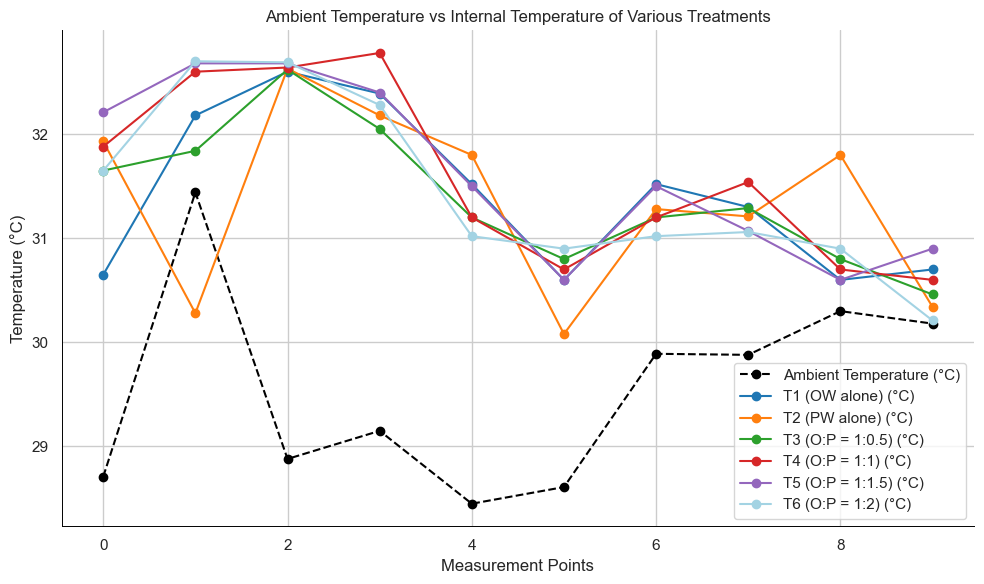

In [73]:
import matplotlib.pyplot as plt
from cycler import cycler

# Data for Ambient Temperature and Internal Temperatures of Various Treatments
ambient_temp = [28.71, 31.44, 28.88, 29.15, 28.45, 28.61, 29.89, 29.88, 30.30, 30.18]
treatment_temps = {
    "T1 (OW alone)": [30.65, 32.18, 32.60, 32.39, 31.52, 30.60, 31.52, 31.30, 30.60, 30.70],
    "T2 (PW alone)": [31.93, 30.28, 32.63, 32.18, 31.80, 30.08, 31.28, 31.21, 31.80, 30.34],
    "T3 (O:P = 1:0.5)": [31.65, 31.84, 32.62, 32.05, 31.20, 30.80, 31.20, 31.29, 30.80, 30.46],
    "T4 (O:P = 1:1)": [31.88, 32.60, 32.64, 32.78, 31.20, 30.70, 31.20, 31.54, 30.70, 30.60],
    "T5 (O:P = 1:1.5)": [32.21, 32.68, 32.68, 32.40, 31.50, 30.60, 31.50, 31.07, 30.60, 30.90],
    "T6 (O:P = 1:2)": [31.65, 32.70, 32.69, 32.28, 31.02, 30.90, 31.02, 31.06, 30.90, 30.21]
}

# Define a color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#a3d3e3']  # Sample colors

# Apply the color palette
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)


# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(ambient_temp, label="Ambient Temperature (°C)", color="black", linestyle="--", marker="o")

# Plot each treatment temperature data
for treatment, temps in treatment_temps.items():
    plt.plot(temps, label=f"{treatment} (°C)", marker="o")

# Set the color of the x and y axes
ax = plt.gca()
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(0.7)  # Set thickness for x-axis
ax.spines['left'].set_linewidth(0.7)    # Set thickness for y-axis

# Hide the top and right spines if needed
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Chart labeling and aesthetics
plt.title("Ambient Temperature vs Internal Temperature of Various Treatments")
plt.xlabel("Measurement Points")
plt.ylabel("Temperature (°C)")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.savefig('ambient_temp_vs_internal_temp_plot.png', dpi=303)
plt.show()

In [59]:
t_avg = {t:np.array(treatment_temps[t]).mean() for t in treatment_temps.keys()}

In [60]:
t_avg

{'T1': 31.406,
 'T2': 31.352999999999998,
 'T3': 31.391,
 'T4': 31.584000000000003,
 'T5': 31.613999999999997,
 'T6': 31.442999999999994}

## Germination %

In [21]:
germination_data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Forastero': [51.00, 57.33, 50.66, 61.33, 74.66, 65.33, 72.33],
    'Criollo': [49.66, 53.33, 49.33, 62.00, 70.66, 64.00, 69.33]
}
germination_df = pd.DataFrame(germination_data)

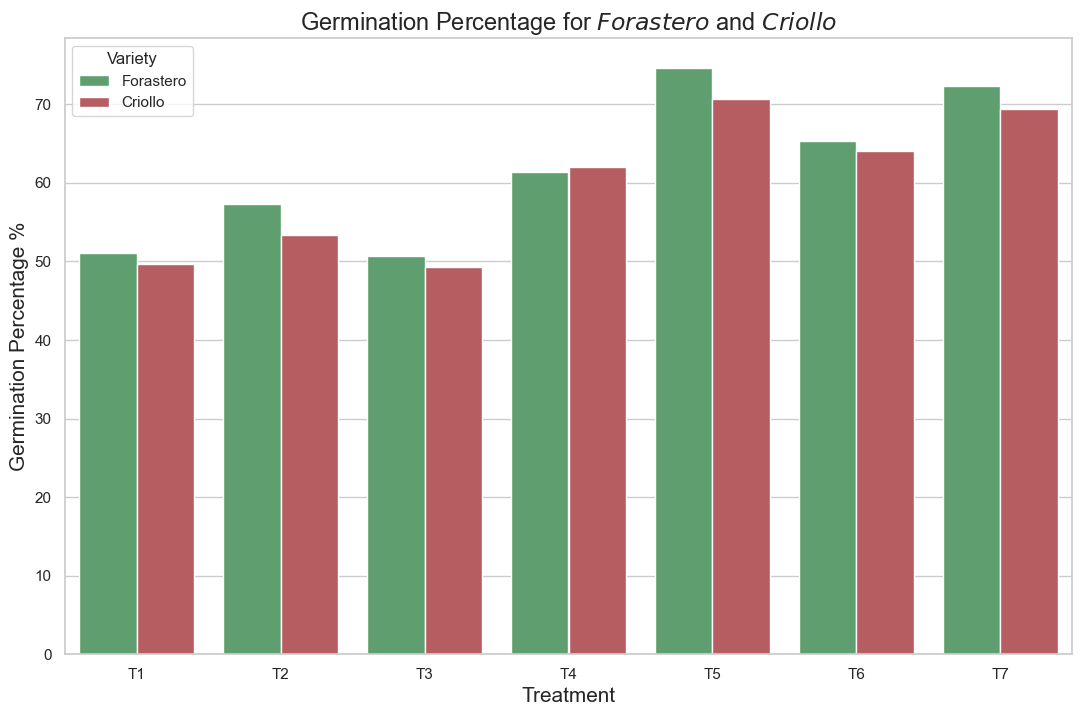

In [41]:
# Plotting Germination Percentage
plt.figure(figsize=(13, 8))
germination_barplot = sns.barplot(x='Treatments', y='value', hue='variable',
            data=pd.melt(germination_df, 
                         id_vars='Treatments',
                         value_vars=['Forastero', 'Criollo']),
            palette=germination_colors)
plt.title('Germination Percentage for ${{Forastero}}$ and ${{{Criollo}}}$', size=17)
plt.ylabel('Germination Percentage %', size=15)
plt.xlabel('Treatment', size=15)

# Customize legend
germination_barplot.legend(title='Variety')

#save
plt.savefig('barplot_of_germination_rate_with_varieties.png', dpi=300)
plt.show()

## Vigour Index

In [28]:
vigour_data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Forastero': [634.85, 739.97, 572.61, 880.05, 1241.04, 895.08, 1135.13],
    'Criollo': [732.16, 818.92, 791.09, 1032.24, 1259.60, 1082.60, 1212.44]
}
vigour_df = pd.DataFrame(vigour_data)

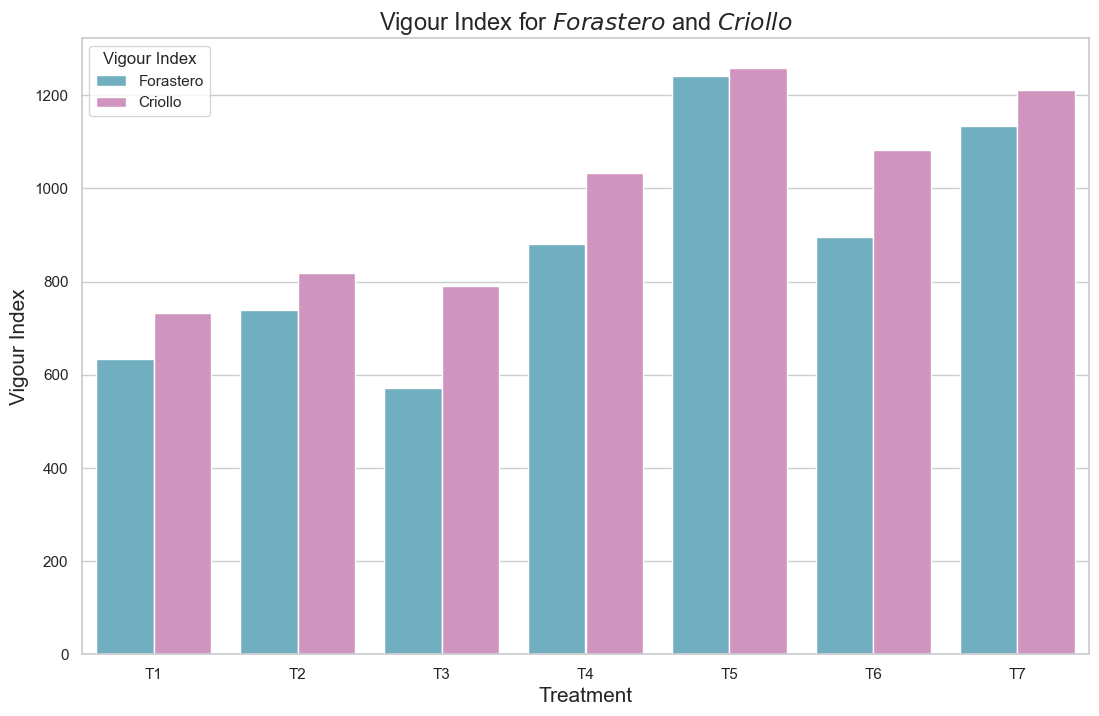

In [42]:
# Plotting Vigour Index
plt.figure(figsize=(13, 8))
vigour_barplot = sns.barplot(x='Treatments', y='value', hue='variable',
            data=pd.melt(vigour_df, 
                         id_vars='Treatments',
                         value_vars=['Forastero', 'Criollo']),
            palette=vigor_colors)
plt.title('Vigour Index for ${Forastero}$ and ${Criollo}$', size=17)
plt.ylabel('Vigour Index', size=15)
plt.xlabel('Treatment', size=15)

# Customize legend
vigour_barplot.legend(title='Vigour Index')

plt.savefig('barplot_of_vigour_index_with_varieties.png', dpi=300)
plt.show()

## Major Nutrient uptake by shoot Forastero

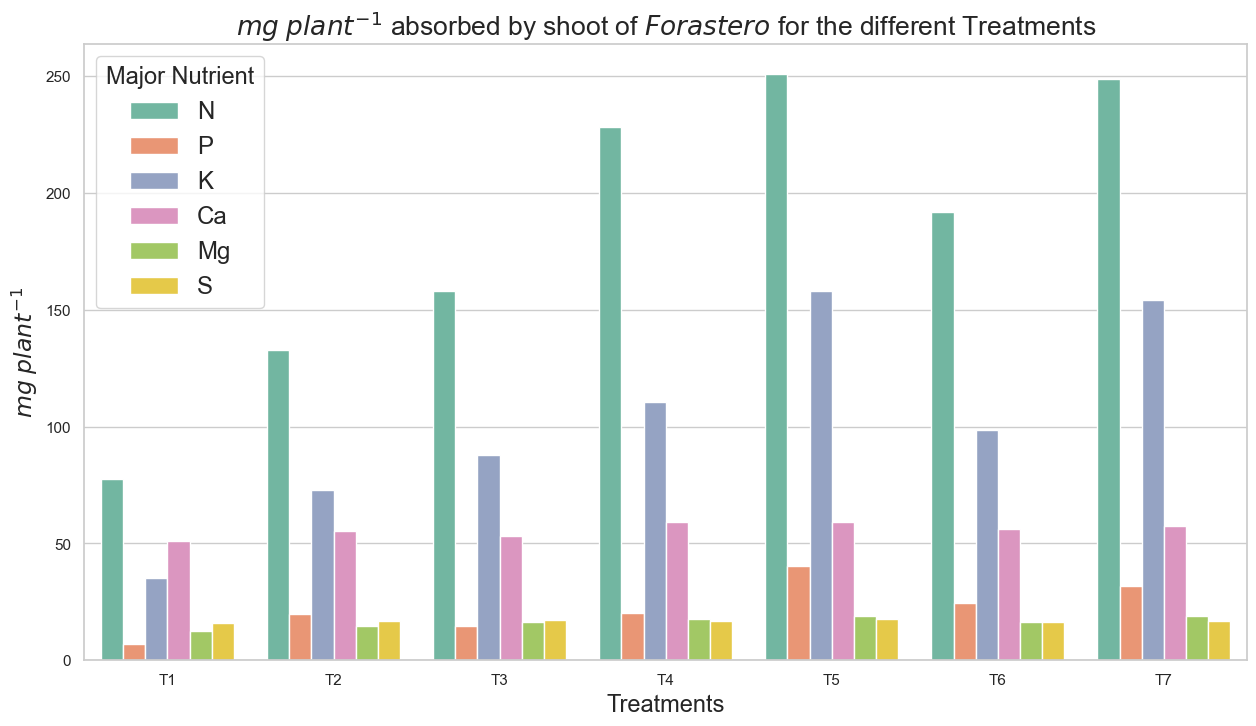

In [72]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'N': [77.80, 132.70, 157.90, 228.20, 251.20, 191.90, 248.80],
    'P': [6.90, 19.70, 14.70, 20.30, 40.40, 24.40, 31.60],
    'K': [35.10, 73.00, 87.70, 110.5, 157.9, 98.5, 154.1],
    'Ca': [51.20, 55.50, 53.00, 59.40, 59.10, 56.10, 57.50],
    'Mg': [12.60, 14.60, 16.20, 17.50, 19.10, 16.40, 18.90],
    'S': [16.00, 16.70, 17.30, 17.00, 17.50, 16.30, 16.60]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
bp = sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='Set2')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by shoot of ${Forastero}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Major Nutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_major_nutrient_absorbed_by_shoot_in_various_treatment.png', dpi=300)
plt.show()

## Nutrient uptake by shoot Criollo

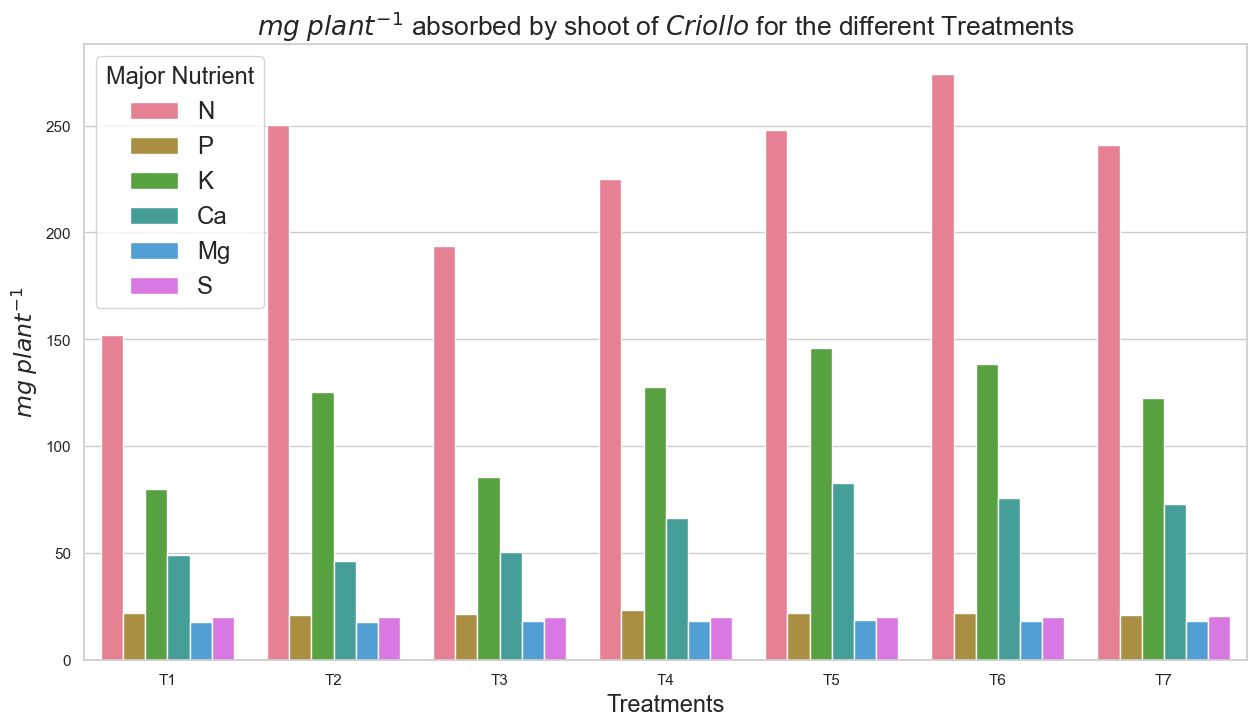

In [75]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'N': [152.3, 250.3, 193.5, 225.2, 247.7, 274.3, 241.1],
    'P': [22.0, 21.3, 21.7, 23.7, 21.9, 22.0, 21.3],
    'K': [80.1, 125.2, 85.6, 127.7, 145.9, 138.6, 122.7],
    'Ca': [49.0, 46.4, 50.5, 66.3, 82.8, 75.7, 73.1],
    'Mg': [18.1, 18.1, 18.2, 18.3, 18.6, 18.5, 18.5],
    'S': [20.1, 20.0, 20.2, 20.4, 20.2, 20.3, 20.5]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='husl')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by shoot of ${Criollo}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Major Nutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_major_nutrient_absorbed_by_shoot_in_various_treatment-Criollo.png', dpi=300)
plt.show()

## Micro Nutrient uptake by shoot Forastero

In [77]:
colors

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

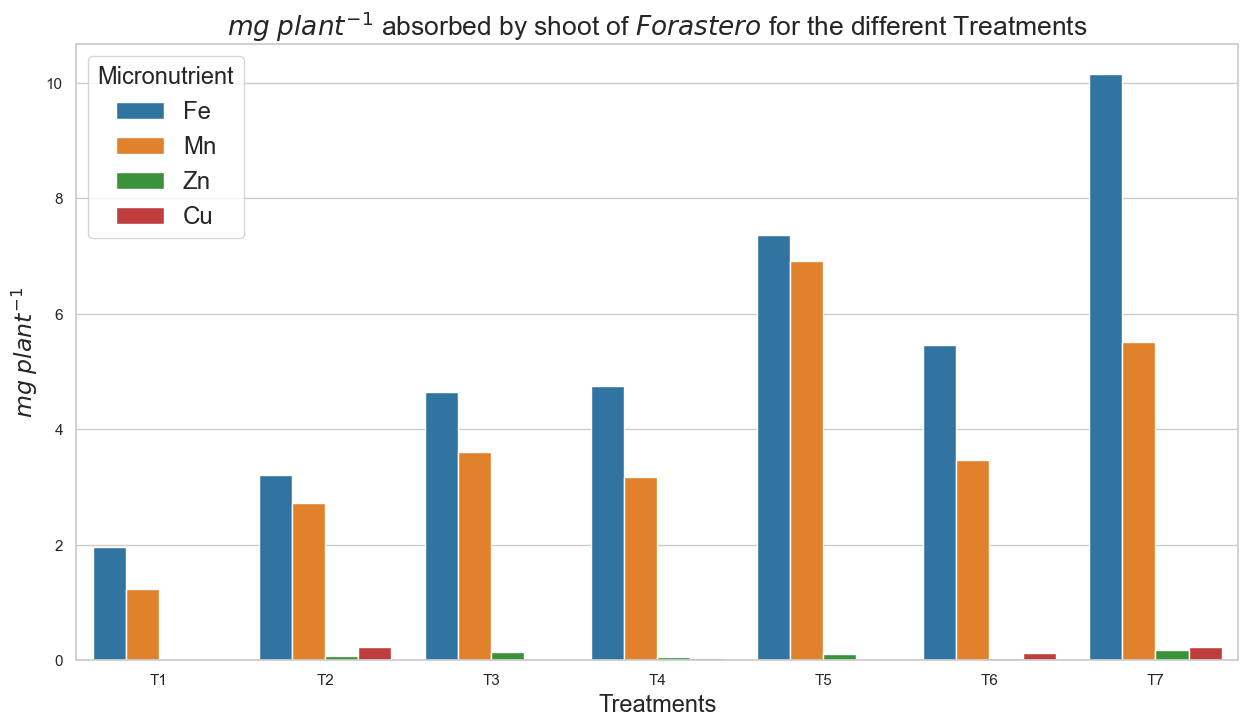

In [90]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Fe': [1.96, 3.21, 4.64, 4.75, 7.36, 5.46, 10.16],
    'Mn': [1.23, 2.72, 3.61, 3.17, 6.92, 3.47, 5.51],
    'Zn': [0.02, 0.08, 0.15, 0.05, 0.10, 0.04, 0.17],
    'Cu': [0.03, 0.23, 0.02, 0.04, 0.02, 0.12, 0.23]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Element', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Element', data=df_melted, palette='tab10')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by shoot of ${Forastero}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Micronutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_micronutrient_absorbed_by_shoot_in_various_treatment-Forastero.png', dpi=300)
plt.show()

## Micro Nutrient uptake by shoot Criollo

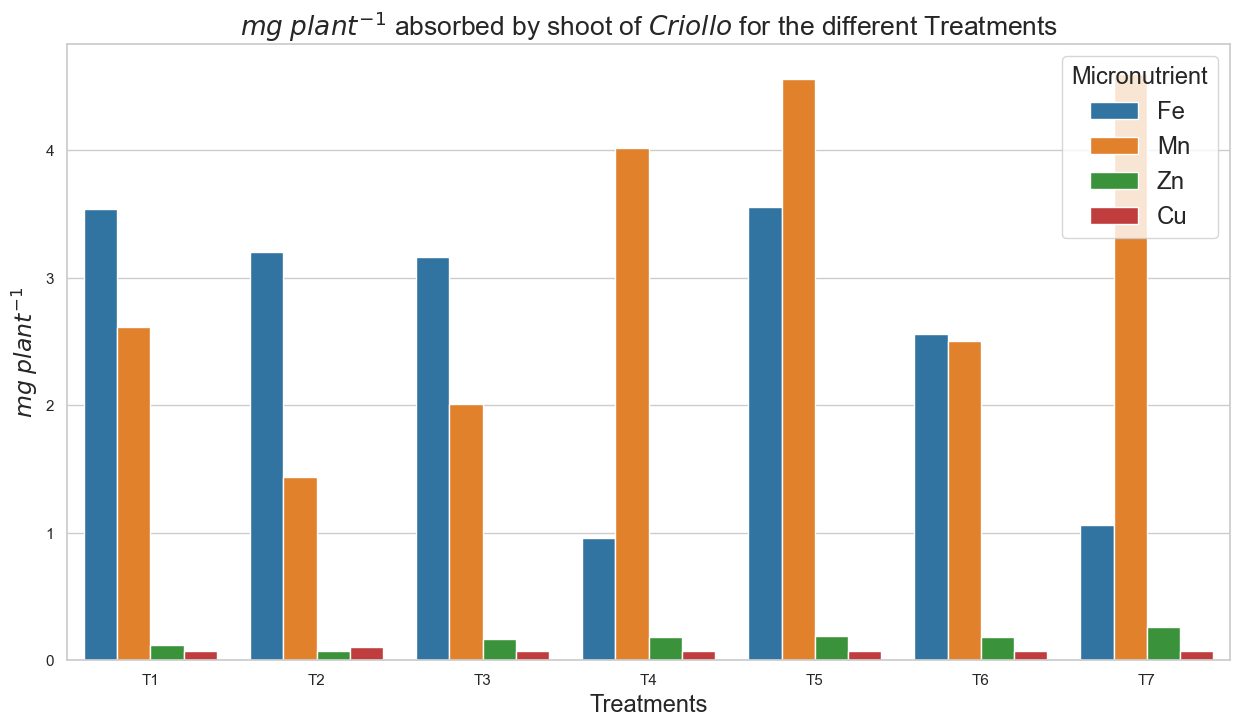

In [85]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Fe': [3.54, 3.20, 3.16, 0.96, 3.55, 2.56, 1.06],
    'Mn': [2.61, 1.44, 2.01, 4.02, 4.56, 2.50, 4.60],
    'Zn': [0.12, 0.07, 0.17, 0.18, 0.19, 0.18, 0.26],
    'Cu': [0.07, 0.10, 0.07, 0.07, 0.07, 0.07, 0.07]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Element', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Element', data=df_melted, palette='tab10')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by shoot of ${Criollo}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Micronutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_micronutrient_absorbed_by_shoot_in_various_treatment-Criollo.png', dpi=300)
plt.show()

## Major Nutrient uptake by root Forastero

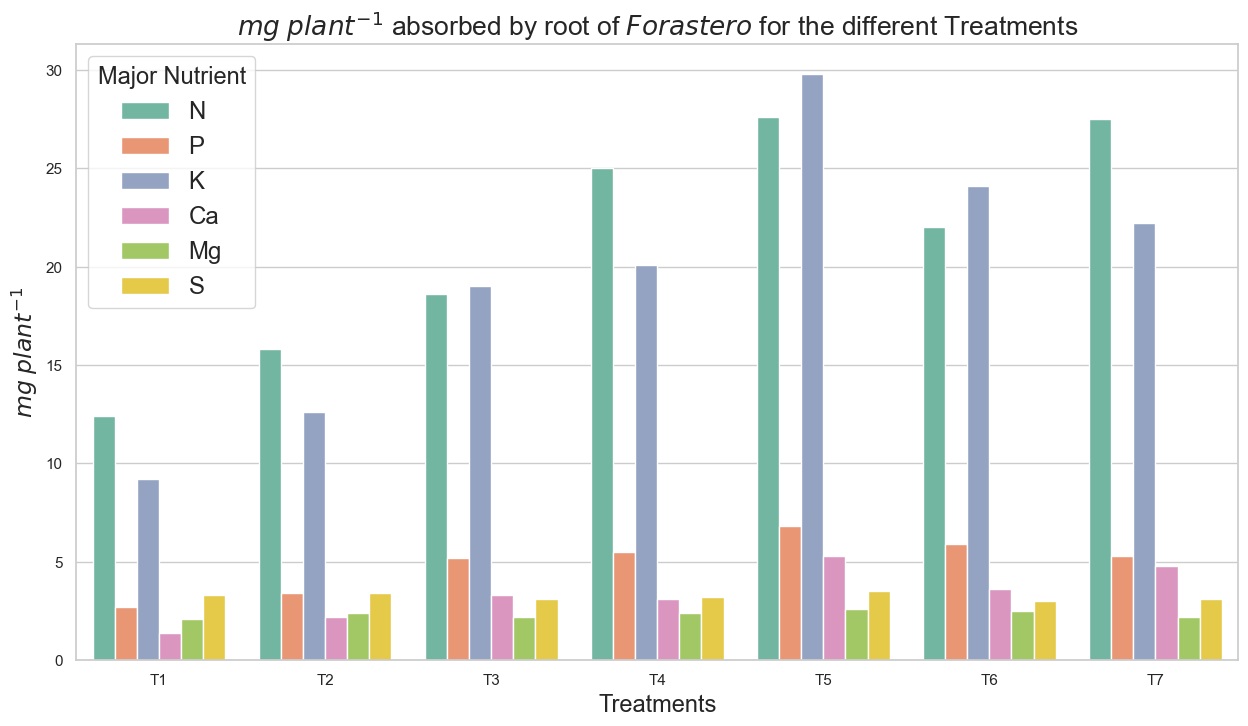

In [86]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'N': [12.4, 15.8, 18.6, 25.0, 27.6, 22.0, 27.5],
    'P': [2.7, 3.4, 5.2, 5.5, 6.8, 5.9, 5.3],
    'K': [9.2, 12.6, 19.0, 20.1, 29.8, 24.1, 22.2],
    'Ca': [1.4, 2.2, 3.3, 3.1, 5.3, 3.6, 4.8],
    'Mg': [2.1, 2.4, 2.2, 2.4, 2.6, 2.5, 2.2],
    'S': [3.3, 3.4, 3.1, 3.2, 3.5, 3.0, 3.1]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
bp = sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='Set2')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by root of ${Forastero}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Major Nutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_major_nutrient_absorbed_by_root_in_various_treatment-Forastero.png', dpi=450)
plt.show()

## Major Nutrient uptake by root Criollo

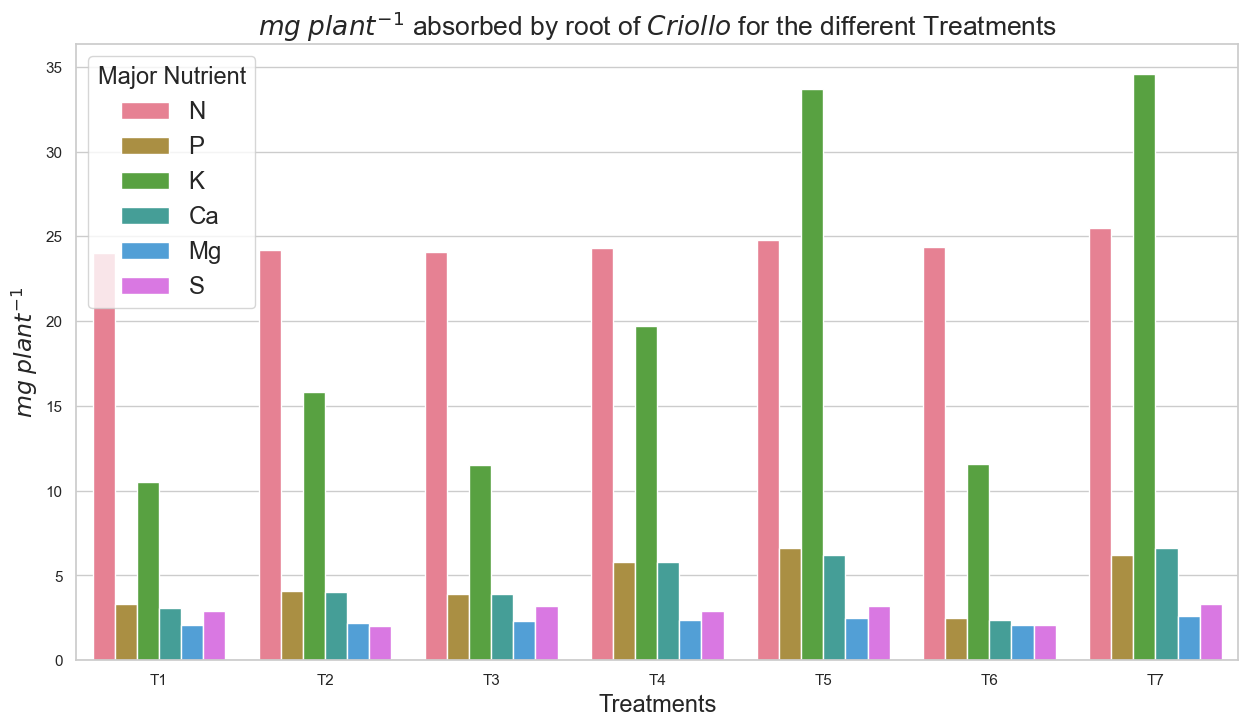

In [87]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'N': [24.0, 24.2, 24.1, 24.3, 24.8, 24.4, 25.5],
    'P': [3.3, 4.1, 3.9, 5.8, 6.6, 2.5, 6.2],
    'K': [10.5, 15.8, 11.5, 19.7, 33.7, 11.6, 34.6],
    'Ca': [3.1, 4.0, 3.9, 5.8, 6.2, 2.4, 6.6],
    'Mg': [2.1, 2.2, 2.3, 2.4, 2.5, 2.1, 2.6],
    'S': [2.9, 2.0, 3.2, 2.9, 3.2, 2.1, 3.3]
}


# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='husl')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by root of ${Criollo}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Major Nutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_major_nutrient_absorbed_by_root_in_various_treatment-Criollo.png', dpi=300)
plt.show()

## Micro Nutrient uptake by shoot Forastero

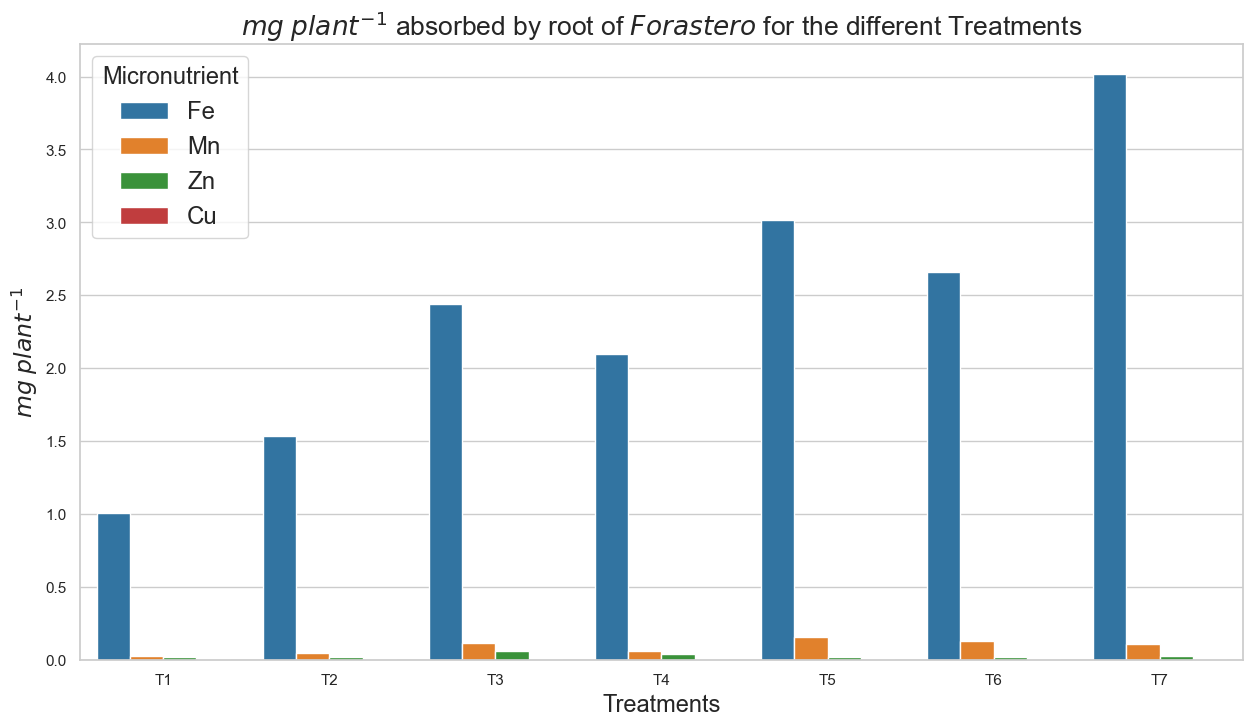

In [89]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Fe': [1.01, 1.54, 2.44, 2.10, 3.02, 2.66, 4.02],
    'Mn': [0.03, 0.05, 0.12, 0.06, 0.16, 0.13, 0.11],
    'Zn': [0.02, 0.02, 0.06, 0.04, 0.02, 0.02, 0.03],
    'Cu': [0.01, 0.01, 0.01, 0.01, 0.009, 0.009, 0.01]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Element', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Element', data=df_melted, palette='tab10')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by root of ${Forastero}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Micronutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_micronutrient_absorbed_by_root_in_various_treatment-Forastero.png', dpi=300)
plt.show()

## Micro Nutrient uptake by root Criollo

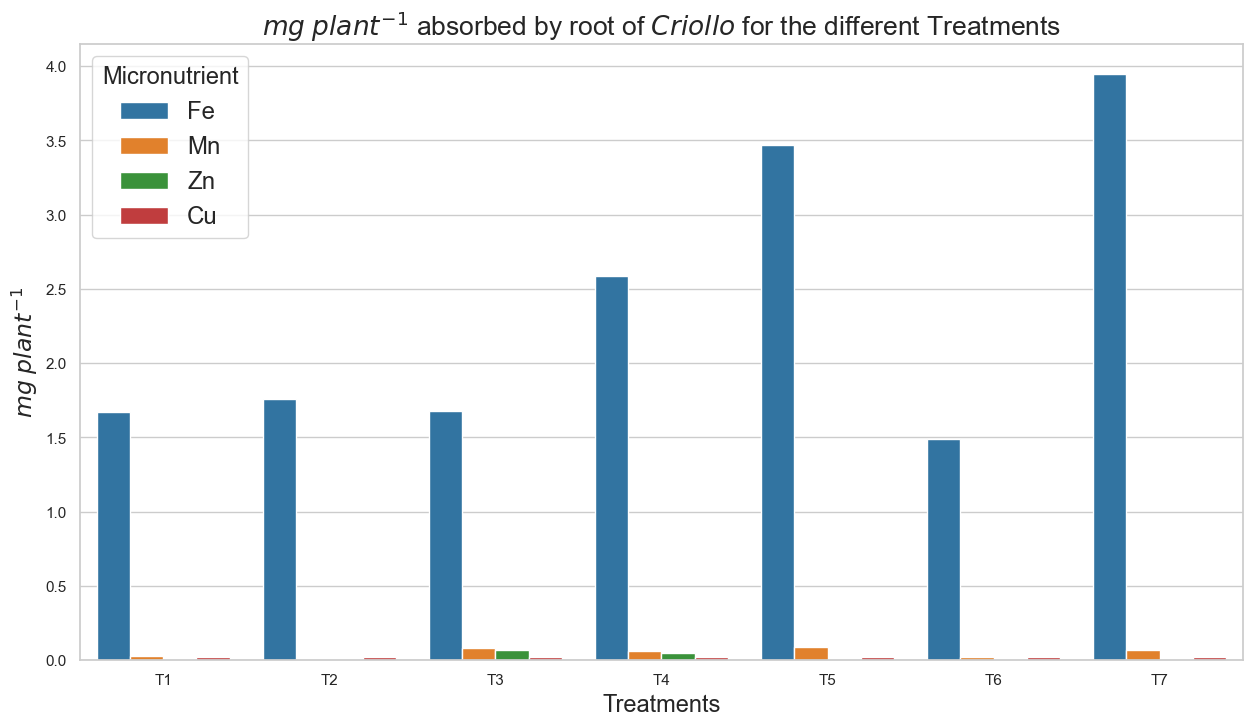

In [91]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Fe': [1.67, 1.76, 1.68, 2.59, 3.47, 1.49, 3.95],
    'Mn': [0.03, 0.009, 0.08, 0.06, 0.09, 0.02, 0.07],
    'Zn': [0.01, 0.01, 0.07, 0.05, 0.01, 0.01, 0.01],
    'Cu': [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Element', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar plots
plt.figure(figsize=(15, 8))
sns.barplot(x='Treatments', y='Value', hue='Element', data=df_melted, palette='tab10')
plt.title('${mg}$ ${{plant}^{-1}}$ absorbed by root of ${Criollo}$ for the different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${{plant}^{-1}}$', size=17)
plt.legend(title='Micronutrient', fontsize='x-large', title_fontsize='17')

plt.savefig('mg_micronutrient_absorbed_by_root_in_various_treatment-Criollo.png', dpi=450)
plt.show()

## Seedling height

### Forastero

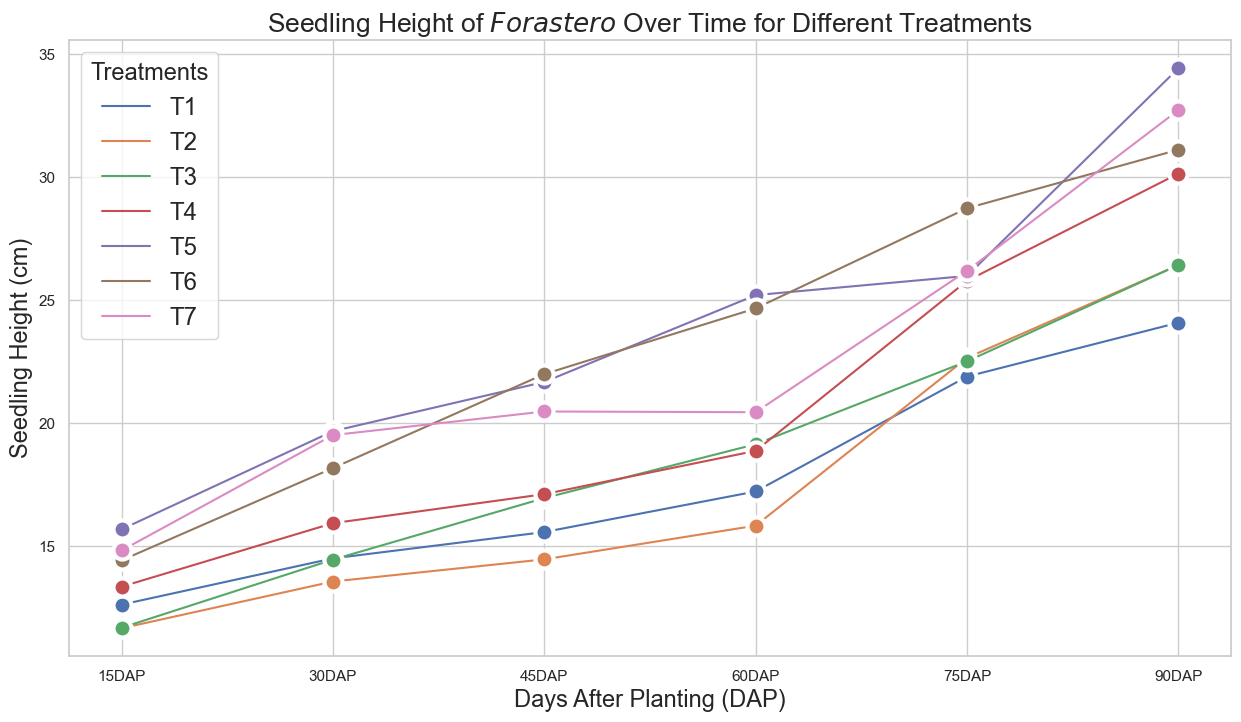

In [110]:
# Your data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [12.62, 11.66, 11.68, 13.35, 15.68, 14.42, 14.82],
    '30DAP': [14.50, 13.56, 14.45, 15.93, 19.67, 18.17, 19.51],
    '45DAP': [15.57, 14.46, 16.95, 17.11, 21.67, 21.99, 20.47],
    '60DAP': [17.22, 15.83, 19.14, 18.87, 25.20, 24.66, 20.44],
    '75DAP': [21.89, 22.65, 22.51, 25.78, 25.98, 28.73, 26.19],
    '90DAP': [24.08, 26.42, 26.42, 30.14, 34.42, 31.11, 32.72]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Height')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Height', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Seedling Height of ${Forastero}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('Seedling Height (cm)', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('seedling_height-Forastero.png', dpi=450)
plt.show()

### Criollo

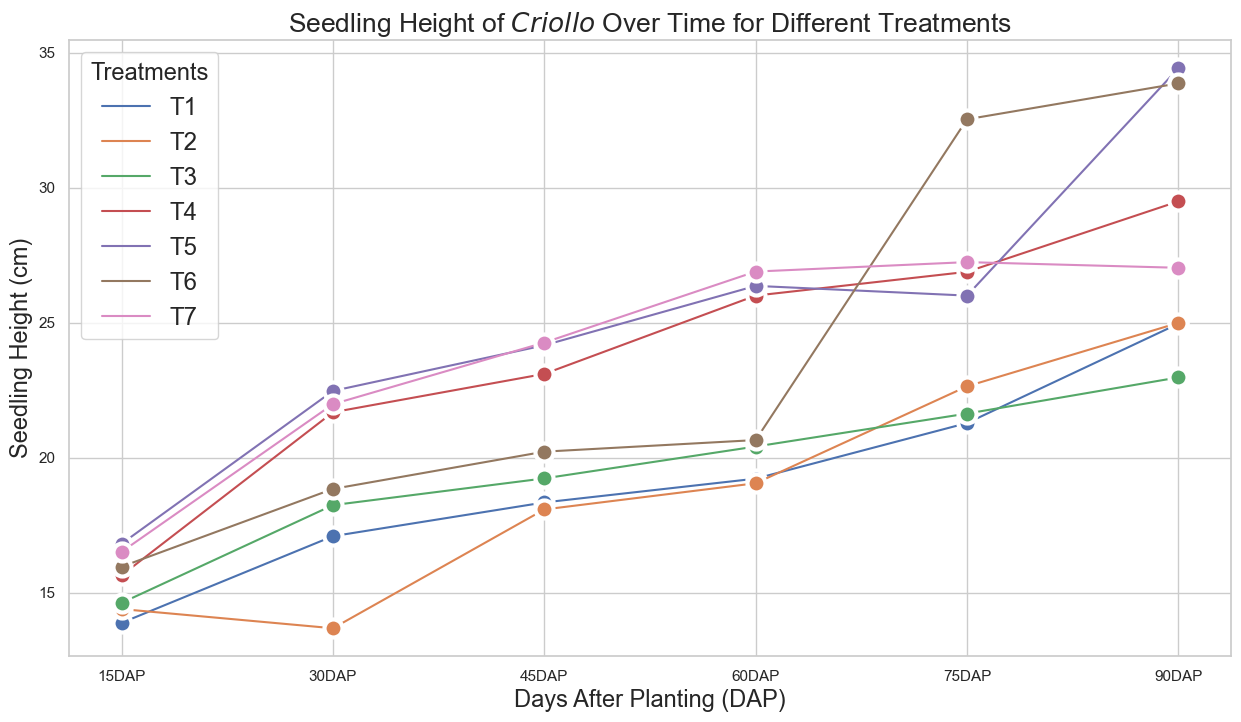

In [109]:
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [13.88, 14.39, 14.62, 15.64, 16.81, 15.96, 16.51],
    '30DAP': [17.09, 13.68, 18.24, 21.68, 22.47, 18.84, 21.98],
    '45DAP': [18.34, 18.08, 19.23, 23.10, 24.16, 20.22, 24.26],
    '60DAP': [19.22, 19.05, 20.41, 26.00, 26.36, 20.65, 26.89],
    '75DAP': [21.28, 22.64, 21.63, 26.88, 26.00, 32.53, 27.24],
    '90DAP': [24.96, 24.99, 22.97, 29.49, 34.42, 33.86, 27.03]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Height')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Height', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Seedling Height of ${Criollo}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('Seedling Height (cm)', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('seedling_height-Criollo.png', dpi=450)
plt.show()

## Seedling Girth

### Forastero

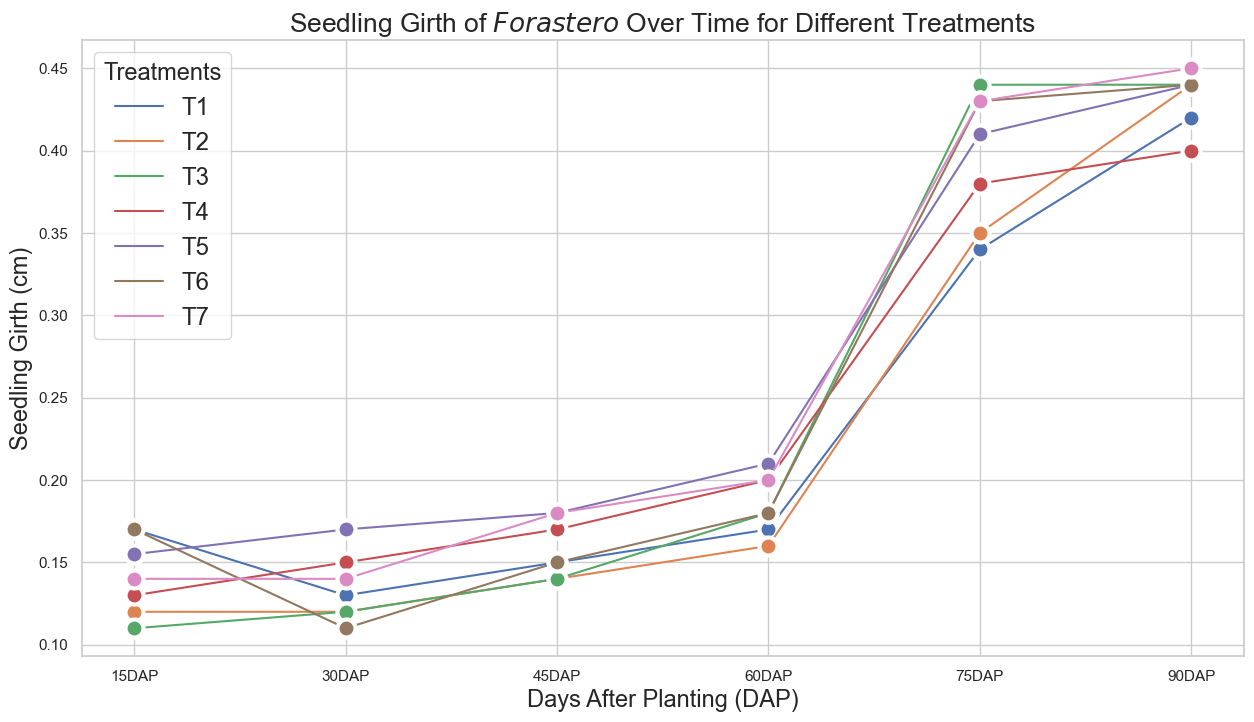

In [113]:
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [0.17, 0.12, 0.11, 0.13, 0.155, 0.17, 0.14],
    '30DAP': [0.13, 0.12, 0.12, 0.15, 0.17, 0.11, 0.14],
    '45DAP': [0.15, 0.14, 0.14, 0.17, 0.18, 0.15, 0.18],
    '60DAP': [0.17, 0.16, 0.18, 0.20, 0.21, 0.18, 0.20],
    '75DAP': [0.34, 0.35, 0.44, 0.38, 0.41, 0.43, 0.43],
    '90DAP': [0.42, 0.44, 0.44, 0.40, 0.44, 0.44, 0.45]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Height')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Height', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Seedling Girth of ${Forastero}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('Seedling Girth (cm)', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('seedling_girth-Forastero.png', dpi=450)
plt.show()

### Criollo

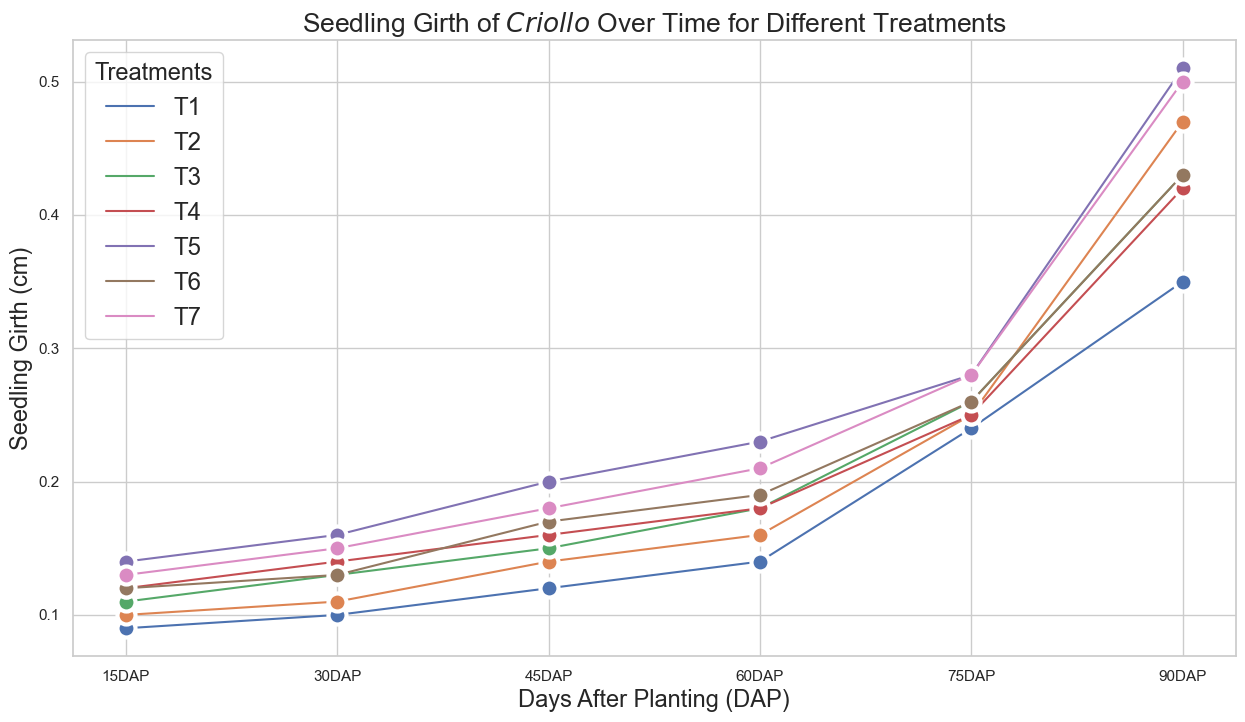

In [112]:
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [0.09, 0.10, 0.11, 0.12, 0.14, 0.12, 0.13],
    '30DAP': [0.10, 0.11, 0.13, 0.14, 0.16, 0.13, 0.15],
    '45DAP': [0.12, 0.14, 0.15, 0.16, 0.20, 0.17, 0.18],
    '60DAP': [0.14, 0.16, 0.18, 0.18, 0.23, 0.19, 0.21],
    '75DAP': [0.24, 0.25, 0.26, 0.25, 0.28, 0.26, 0.28],
    '90DAP': [0.35, 0.47, 0.43, 0.42, 0.51, 0.43, 0.50]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Height')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Height', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Seedling Girth of ${Criollo}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('Seedling Girth (cm)', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('seedling_girth-Criollo.png', dpi=450)
plt.show()

## Leave Number

### Forastero

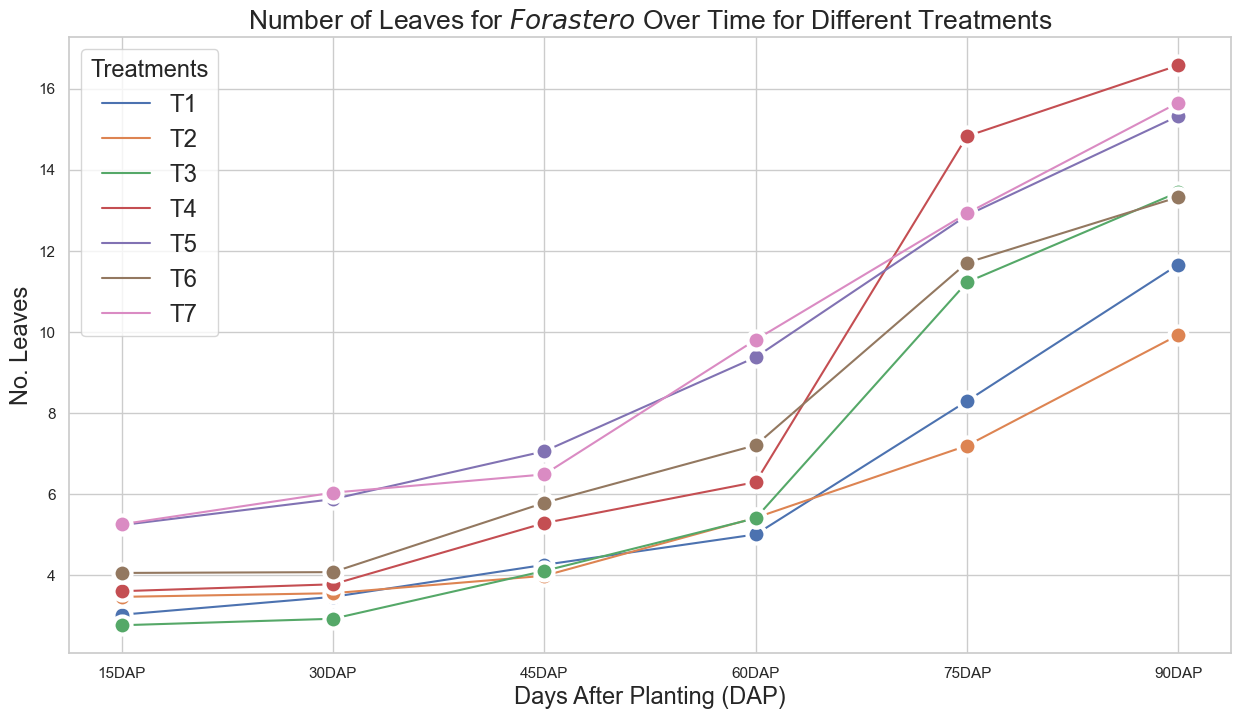

In [114]:
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [3.03, 3.47, 2.77, 3.61, 5.24, 4.06, 5.26],
    '30DAP': [3.47, 3.56, 2.93, 3.78, 5.88, 4.08, 6.04],
    '45DAP': [4.26, 3.99, 4.11, 5.29, 7.06, 5.79, 6.49],
    '60DAP': [5.01, 5.42, 5.41, 6.30, 9.38, 7.21, 9.81],
    '75DAP': [8.30, 7.20, 11.23, 14.83, 12.88, 11.71, 12.93],
    '90DAP': [11.666, 9.93, 13.45, 16.58, 15.33, 13.33, 15.66]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Number of Leaves')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Number of Leaves', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Number of Leaves for ${Forastero}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('No. Leaves', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('leaves_number-Forastero.png', dpi=450)
plt.show()

### Criollo

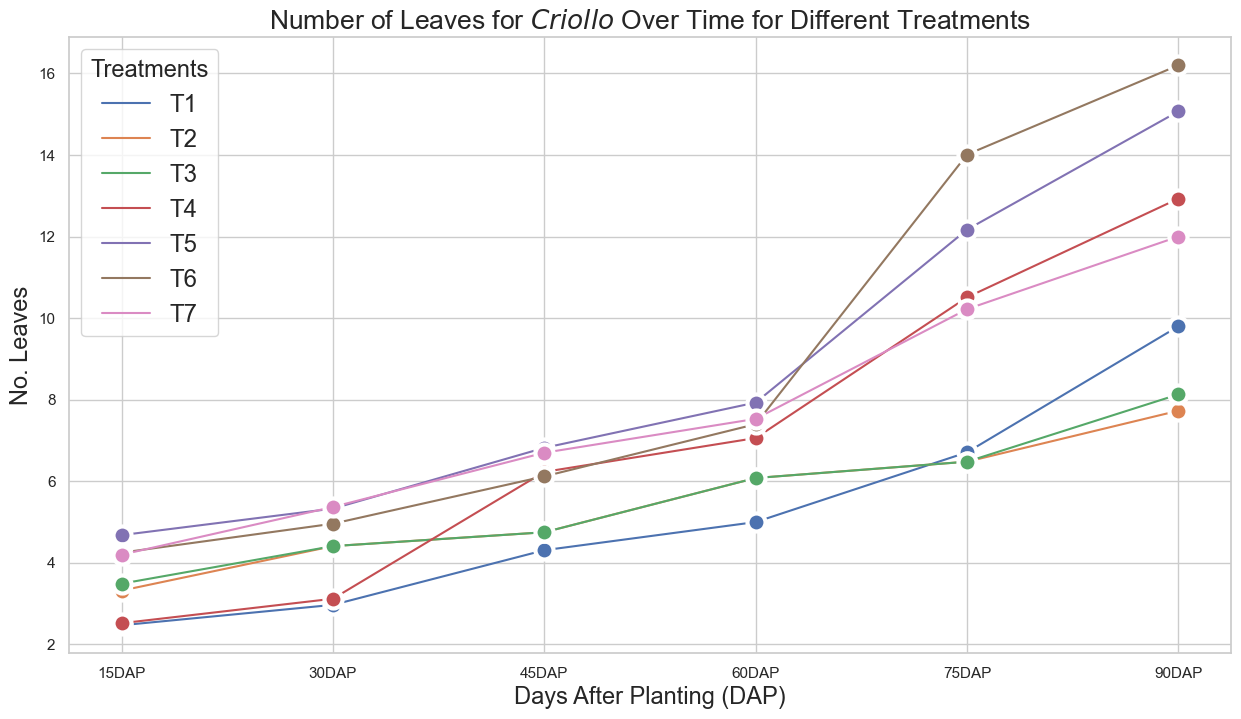

In [115]:
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    '15DAP': [2.47, 3.32, 3.49, 2.52, 4.68, 4.25, 4.20],
    '30DAP': [2.97, 4.41, 4.41, 3.12, 5.33, 4.96, 5.37],
    '45DAP': [4.31, 4.75, 4.75, 6.23, 6.82, 6.12, 6.70],
    '60DAP': [5.00, 6.08, 6.08, 7.06, 7.93, 7.40, 7.53],
    '75DAP': [6.71, 6.48, 6.48, 10.51, 12.17, 14.01, 10.22],
    '90DAP': [9.80, 7.73, 8.13, 12.93, 15.07, 16.20, 12.00]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Days After Planting', value_name='Number of Leaves')

# Set the style
sns.set(style="whitegrid")

# Create line plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Days After Planting', 
             y='Number of Leaves', 
             hue='Treatments',  
             data=df_melted, 
             marker='o',  # Use markers for data points
             markeredgewidth=3,
             markersize=13,
             palette='deep')
plt.title('Number of Leaves for ${Criollo}$ Over Time for Different Treatments', size=19)
plt.xlabel('Days After Planting (DAP)', size=17)
plt.ylabel('No. Leaves', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('leaves_number-Criollo.png', dpi=450)
plt.show()

## Biochemical Constituents

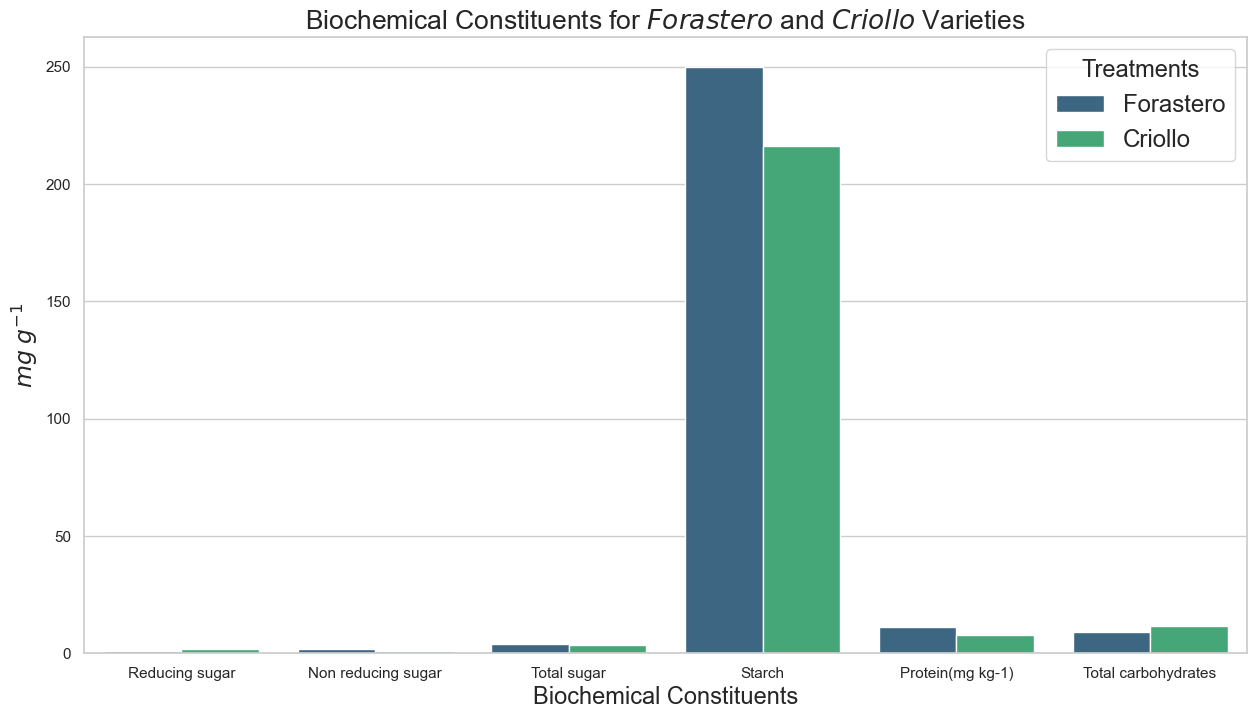

In [122]:
# Sample data
data = {
    'Biochemical Constituents': ['Reducing sugar', 'Non reducing sugar', 'Total sugar',
                                  'Starch', 'Protein(mg kg-1)', 'Total carbohydrates'],
    'Forastero': [1.03, 1.6, 3.84, 250, 11.1, 9.16],
    'Criollo': [1.67, 1.17, 3.63, 216, 7.9, 11.4]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Biochemical Constituents', var_name='Varieties', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Biochemical Constituents', y='Value', hue='Varieties', data=df_melted, palette='viridis')
plt.title('Biochemical Constituents for ${Forastero}$ and ${Criollo}$ Varieties', size=19)
plt.xlabel('Biochemical Constituents', size=17)
plt.ylabel('${mg}$ ${g^{-1}}$', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')
plt.savefig("biochemical_constituents.png", dpi=450)

plt.show()

## Biochemical content after germination

### Forastero

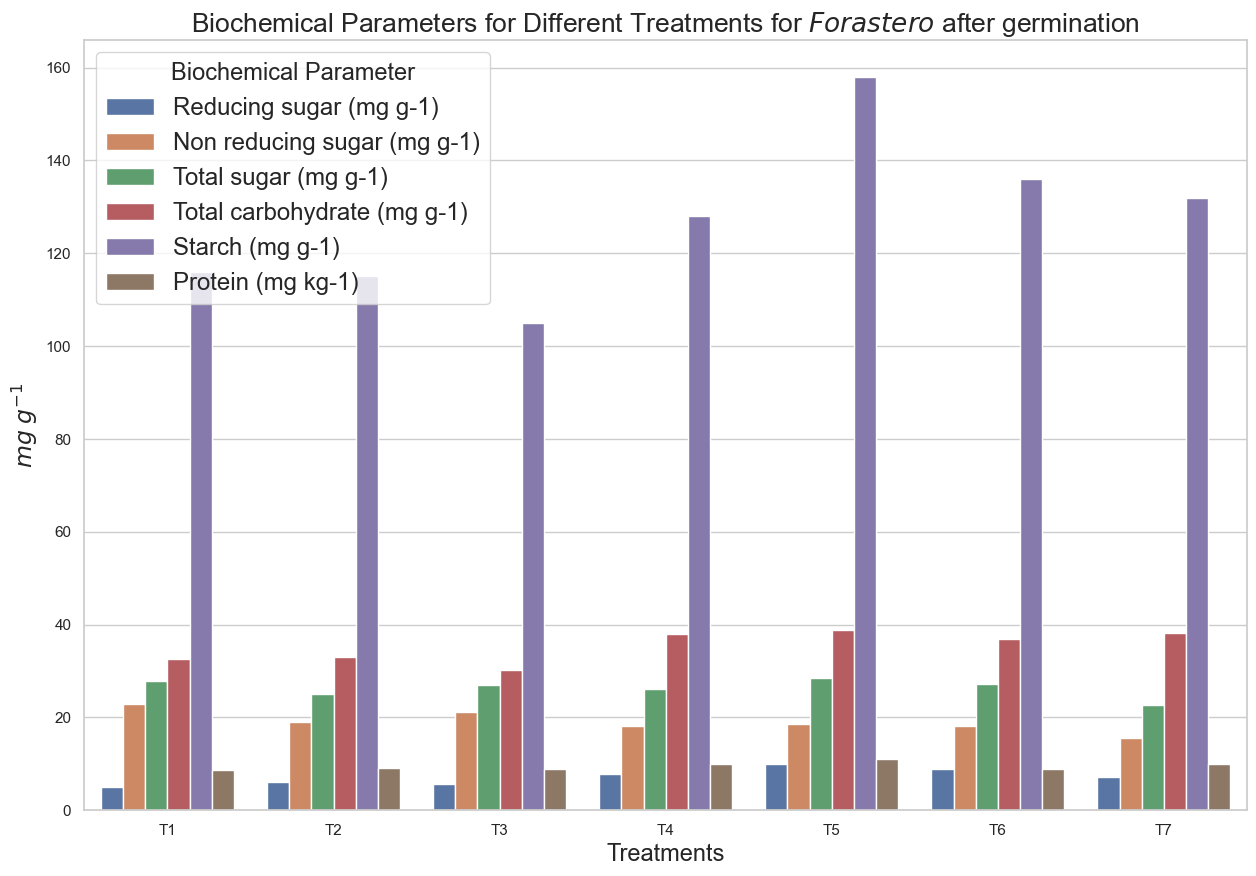

In [128]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Reducing sugar (mg g-1)': [5.1, 6.0, 5.7, 7.8, 9.9, 8.9, 7.1],
    'Non reducing sugar (mg g-1)': [22.90, 19.10, 21.20, 18.25, 18.65, 18.15, 15.65],
    'Total sugar (mg g-1)': [27.90, 25.10, 26.96, 26.15, 28.55, 27.15, 22.75],
    'Total carbohydrate (mg g-1)': [32.60, 33.00, 30.16, 38.00, 38.90, 37.00, 38.20],
    'Starch (mg g-1)': [116.0, 115.0, 105.0, 128.0, 158.0, 136.0, 132.0],
    'Protein (mg kg-1)': [8.60, 9.20, 8.80, 10.04, 10.95, 8.86, 9.99]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='deep')
plt.title('Biochemical Parameters for Different Treatments for ${Forastero}$ after germination', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${g^{-1}}$', size=17)
plt.legend(title='Biochemical Parameter', fontsize='x-large', title_fontsize='17')
plt.savefig("biochemical_constituents_after-Forastero.png", dpi=450)

plt.show()

### Criollo

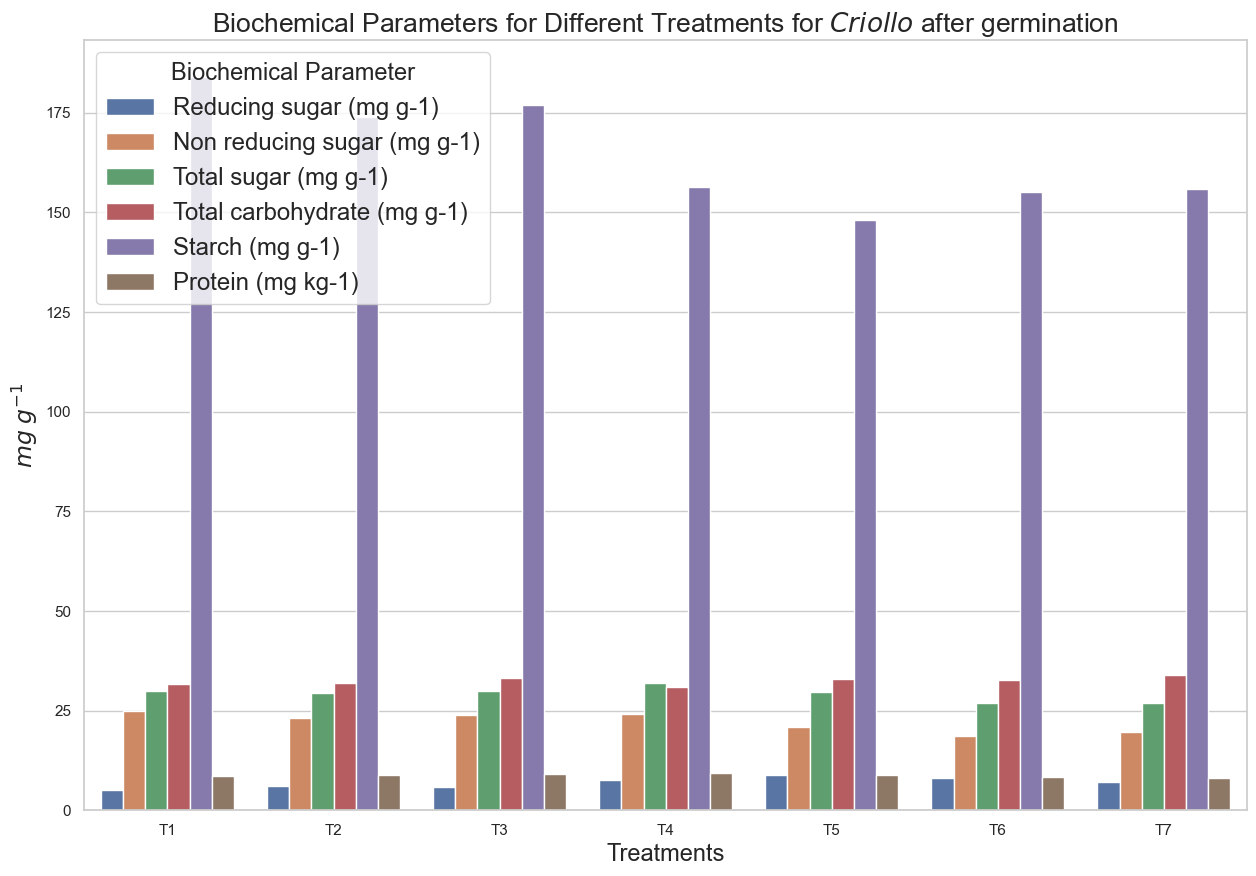

In [129]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7'],
    'Reducing sugar (mg g-1)': [5.1, 6.2, 5.8, 7.7, 8.9, 8.2, 7.2],
    'Non reducing sugar (mg g-1)': [24.81, 23.21, 24.0, 24.12, 20.81, 18.62, 19.65],
    'Total sugar (mg g-1)': [29.91, 29.41, 29.80, 31.82, 29.71, 26.82, 26.85],
    'Total carbohydrate (mg g-1)': [31.60, 32.00, 33.26, 31.00, 33.00, 32.60, 34.00],
    'Starch (mg g-1)': [184.0, 174.0, 177.0, 156.4, 148.0, 155.0, 156.0],
    'Protein (mg kg-1)': [8.60, 8.90, 9.20, 9.31, 8.81, 8.23, 8.10]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='deep')
plt.title('Biochemical Parameters for Different Treatments for ${Criollo}$ after germination', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${g^{-1}}$', size=17)
plt.legend(title='Biochemical Parameter', fontsize='x-large', title_fontsize='17')
plt.savefig("biochemical_constituents_after-Criollo.png", dpi=450)

plt.show()

## Major Nutrient

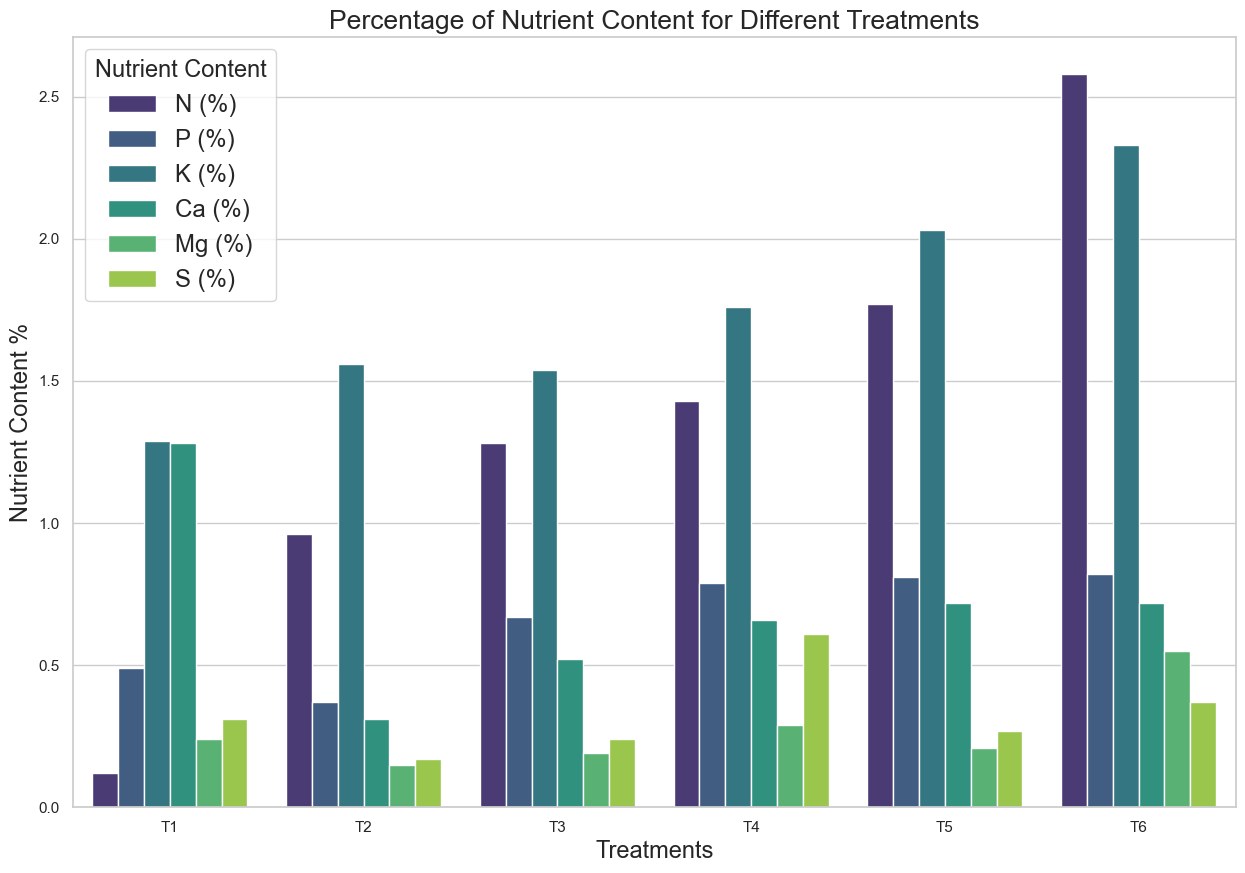

In [131]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'N (%)': [0.12, 0.96, 1.28, 1.43, 1.77, 2.58],
    'P (%)': [0.49, 0.37, 0.67, 0.79, 0.81, 0.82],
    'K (%)': [1.29, 1.56, 1.54, 1.76, 2.03, 2.33],
    'Ca (%)': [1.28, 0.31, 0.52, 0.66, 0.72, 0.72],
    'Mg (%)': [0.24, 0.15, 0.19, 0.29, 0.21, 0.55],
    'S (%)': [0.31, 0.17, 0.24, 0.61, 0.27, 0.37]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Percentage')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatments', y='Percentage', hue='Parameter', data=df_melted, palette='viridis')
plt.title('Percentage of Nutrient Content for Different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('Nutrient Content %', size=17)
plt.legend(title='Nutrient Content', fontsize='x-large', title_fontsize='17')

plt.savefig("nutrient_content_in_slurry.png", dpi=450)
plt.show()

## Micro Nutrient

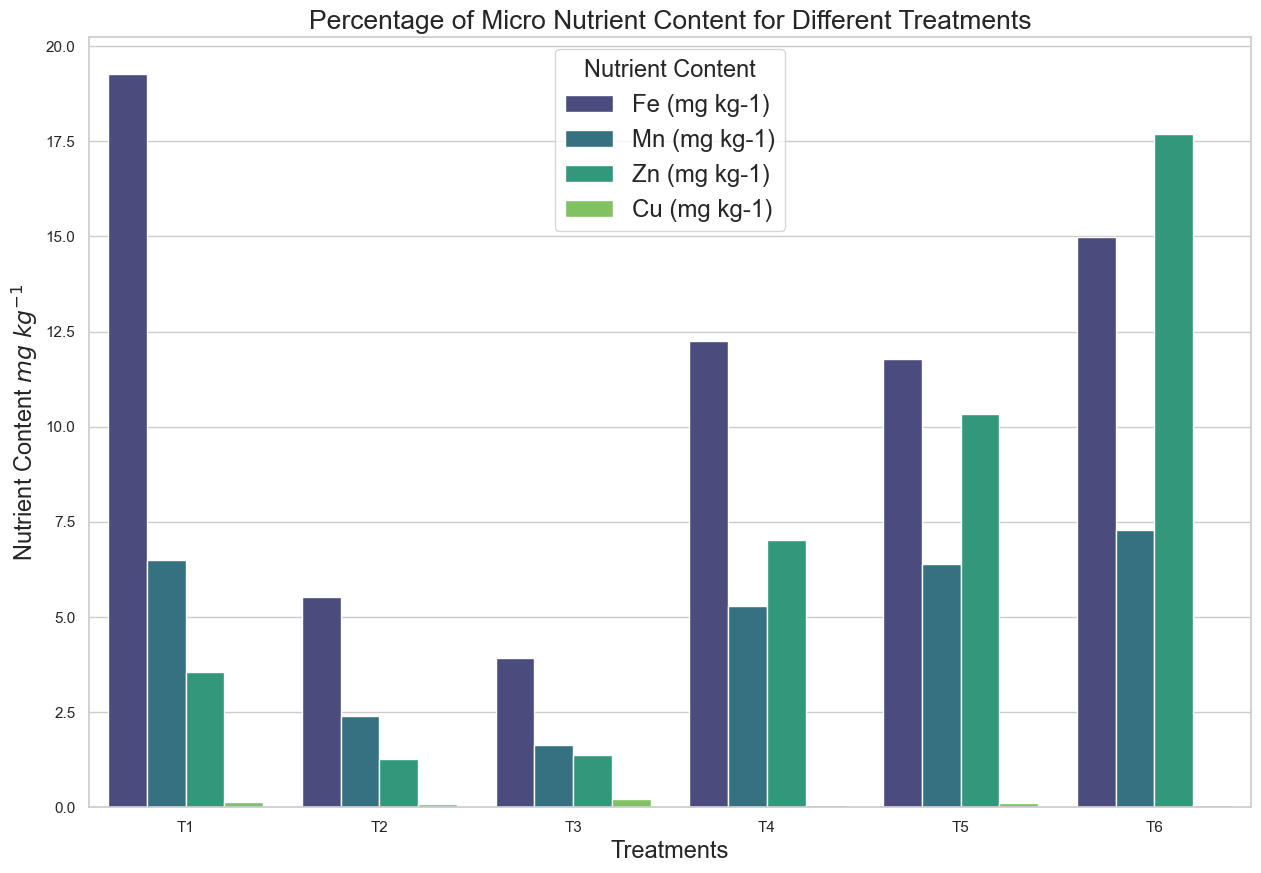

In [136]:
# Sample data
data = {
    'Treatment': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Fe (mg kg-1)': [19.27, 5.52, 3.92, 12.24, 11.78, 14.98],
    'Mn (mg kg-1)': [6.50, 2.39, 1.64, 5.29, 6.38, 7.29],
    'Zn (mg kg-1)': [3.55, 1.28, 1.38, 7.02, 10.33, 17.68],
    'Cu (mg kg-1)': [0.15, 0.08, 0.22, 0.07, 0.10, 0.06]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatment', var_name='Parameter', value_name='Micro Nutrient')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatment', y='Micro Nutrient', hue='Parameter', data=df_melted, palette='viridis')
plt.title('Percentage of Micro Nutrient Content for Different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('Nutrient Content ${mg}$ ${kg^{-1}}$', size=17)
plt.legend(title='Nutrient Content', fontsize='x-large', title_fontsize='17')

plt.savefig("micro_nutrient_content_in_slurry.png", dpi=450)
plt.show()

## Heavy Metal

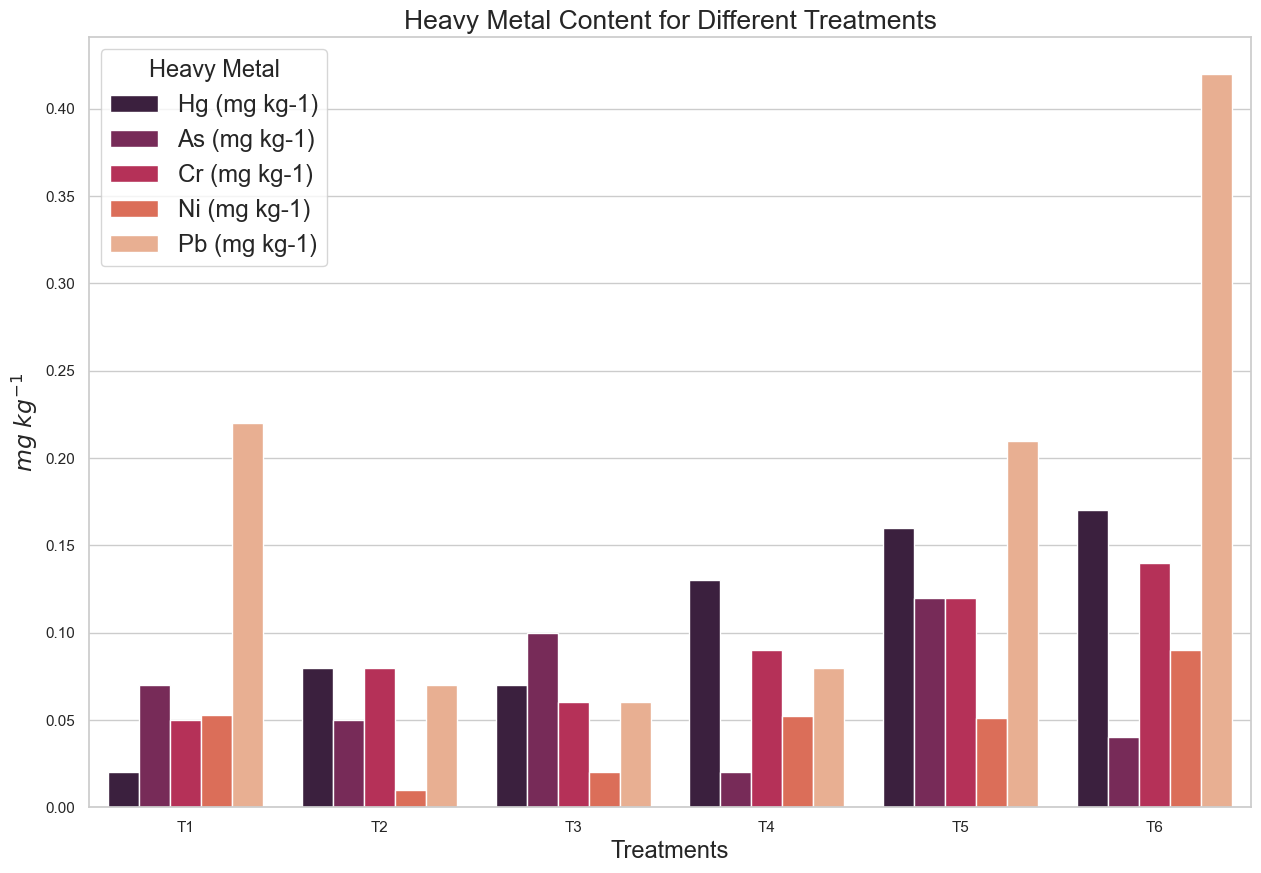

In [141]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Hg (mg kg-1)': [0.02, 0.08, 0.07, 0.13, 0.16, 0.17],
    'As (mg kg-1)': [0.07, 0.05, 0.10, 0.02, 0.12, 0.04],
    'Cr (mg kg-1)': [0.05, 0.08, 0.06, 0.09, 0.12, 0.14],
    'Ni (mg kg-1)': [0.053, 0.01, 0.02, 0.052, 0.051, 0.09],
    'Pb (mg kg-1)': [0.22, 0.07, 0.06, 0.08, 0.21, 0.42]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Heavy Metal', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatments', y='Value', hue='Heavy Metal', data=df_melted, palette='rocket')
plt.title('Heavy Metal Content for Different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${kg^{-1}}$', size=17)
plt.legend(title='Heavy Metal', fontsize='x-large', title_fontsize='17')

plt.savefig("heavy_metal_in_slurry.png", dpi=450)
plt.show()

## Water Soluble Nutrients

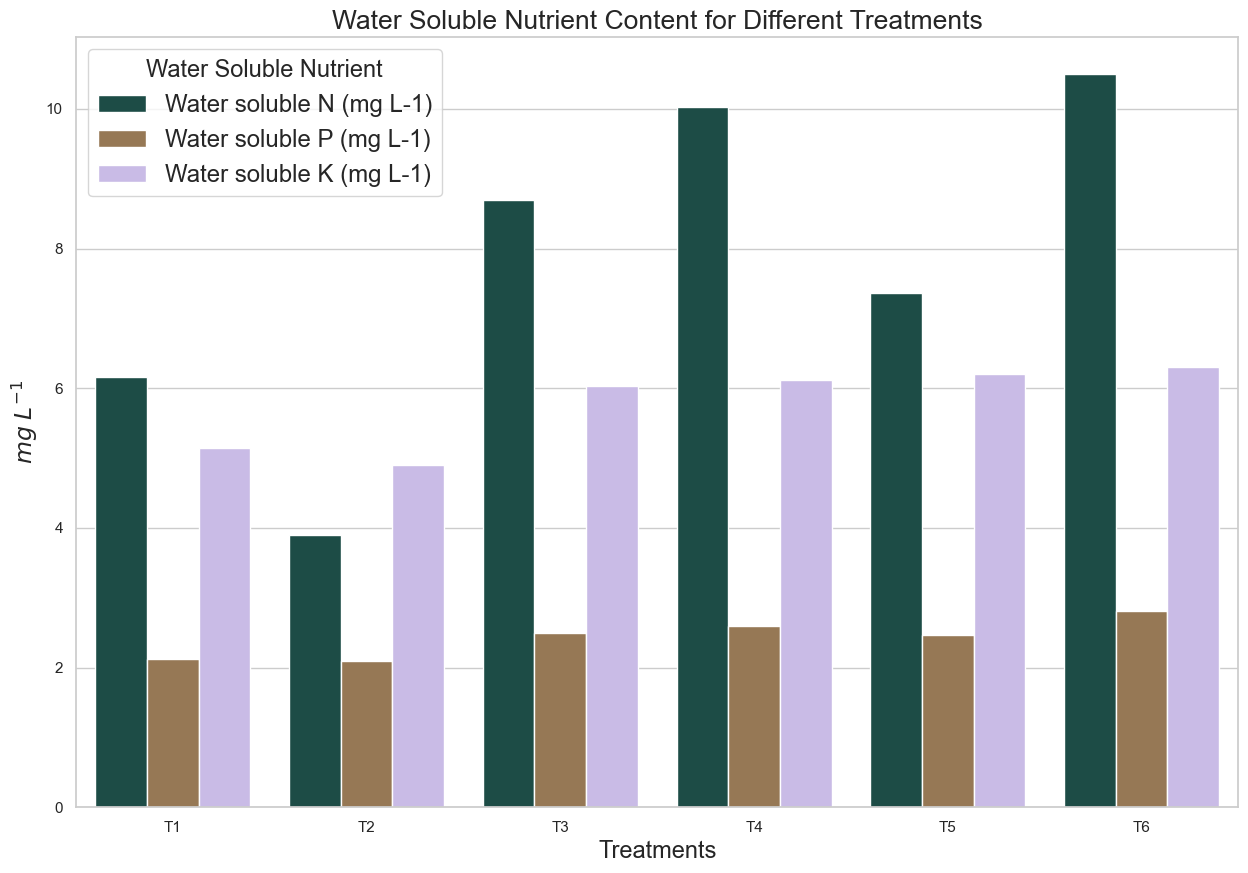

In [144]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Water soluble N (mg L-1)': [6.16, 3.90, 8.70, 10.03, 7.36, 10.50],
    'Water soluble P (mg L-1)': [2.12, 2.10, 2.50, 2.60, 2.46, 2.81],
    'Water soluble K (mg L-1)': [5.15, 4.90, 6.03, 6.12, 6.21, 6.30],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame for Seaborn
df_melted = pd.melt(df, id_vars='Treatments', var_name='Parameter', value_name='Value')

# Set the style
sns.set(style="whitegrid")

# Create bar charts
plt.figure(figsize=(15, 10))
sns.barplot(x='Treatments', y='Value', hue='Parameter', data=df_melted, palette='cubehelix')
plt.title('Water Soluble Nutrient Content for Different Treatments', size=19)
plt.xlabel('Treatments', size=17)
plt.ylabel('${mg}$ ${L^{-1}}$', size=17)
plt.legend(title='Water Soluble Nutrient', fontsize='x-large', title_fontsize='17')

plt.savefig("water_soluble_nutrient_in_slurry.png", dpi=450)
plt.show()

## HRT

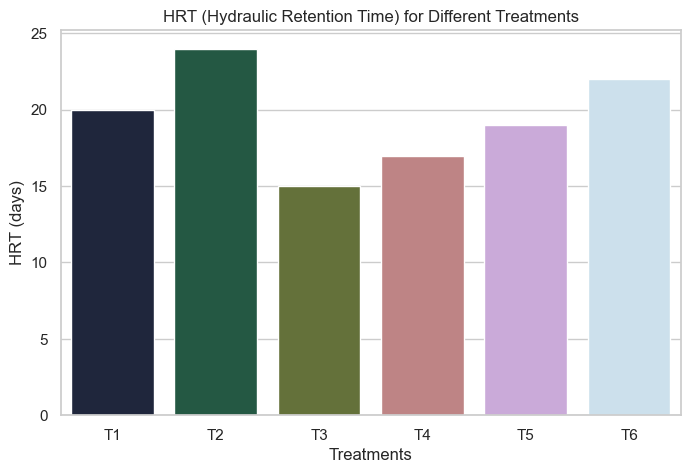

In [149]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'HRT (days)': [20, 24, 15, 17, 19, 22],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Treatments', y='HRT (days)', data=df, palette='cubehelix')
plt.title('HRT (Hydraulic Retention Time) for Different Treatments')
plt.xlabel('Treatments')
plt.ylabel('HRT (days)') 
plt.savefig('hrt.png', dpi=450)
plt.show()

## Pie chart of volume of gas content

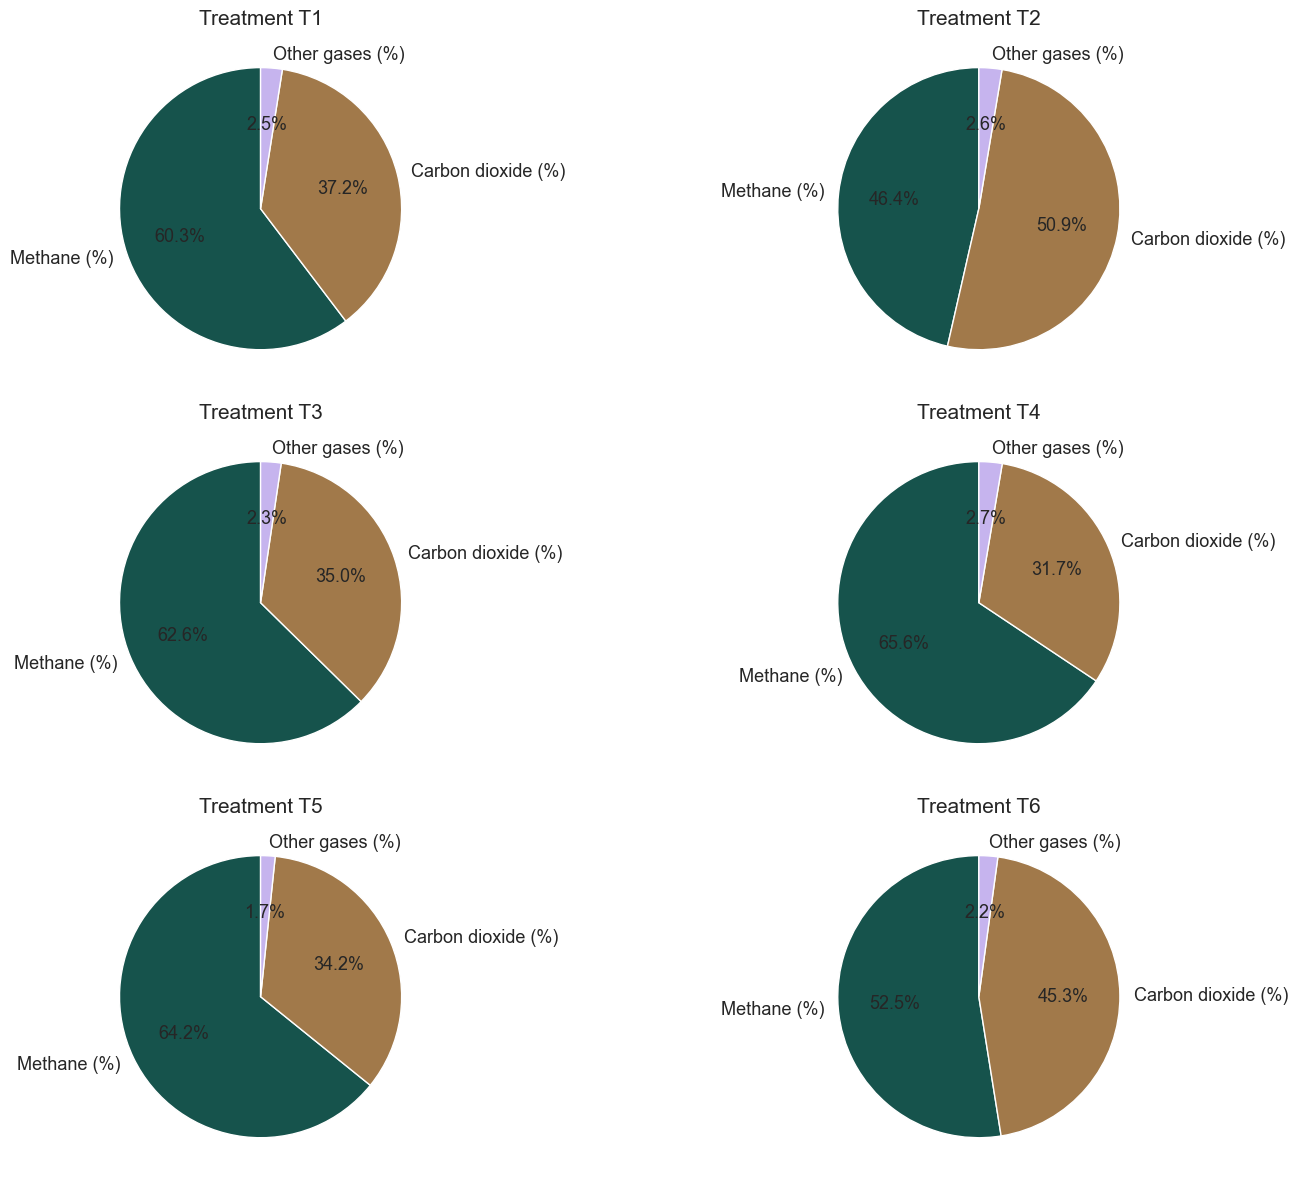

In [169]:
# Sample data
data = {
    'Treatment': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Methane (%)': [59.00, 45.36, 61.19, 64.20, 62.71, 51.32],
    'Carbon dioxide (%)': [36.38, 49.76, 34.21, 31.00, 33.37, 44.27],
    'Other gases (%)': [2.42, 2.57, 2.29, 2.60, 1.62, 2.11],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create pie charts for each treatment
plt.figure(figsize=(15, 12))
for i, treatment in enumerate(df['Treatment']):
    plt.subplot(3, 2, i+1)
    plt.pie(df.loc[df['Treatment'] == treatment].iloc[:, 1:].values.flatten(),
            labels=df.columns[1:],
            autopct='%1.1f%%',
            startangle=90,
            colors=sns.color_palette('cubehelix', 3), 
            explode = [0,0,0],
            textprops = {'fontsize':13}, #wedgeprops = {'linewidth': 6}, frame = 'true', center = (0.1,0.1),
           )
    plt.title(f'Treatment {treatment}', size=15)

plt.tight_layout()

plt.savefig('pie_chart.png', dpi=450)
plt.show()

## Total volume of gas produced daily

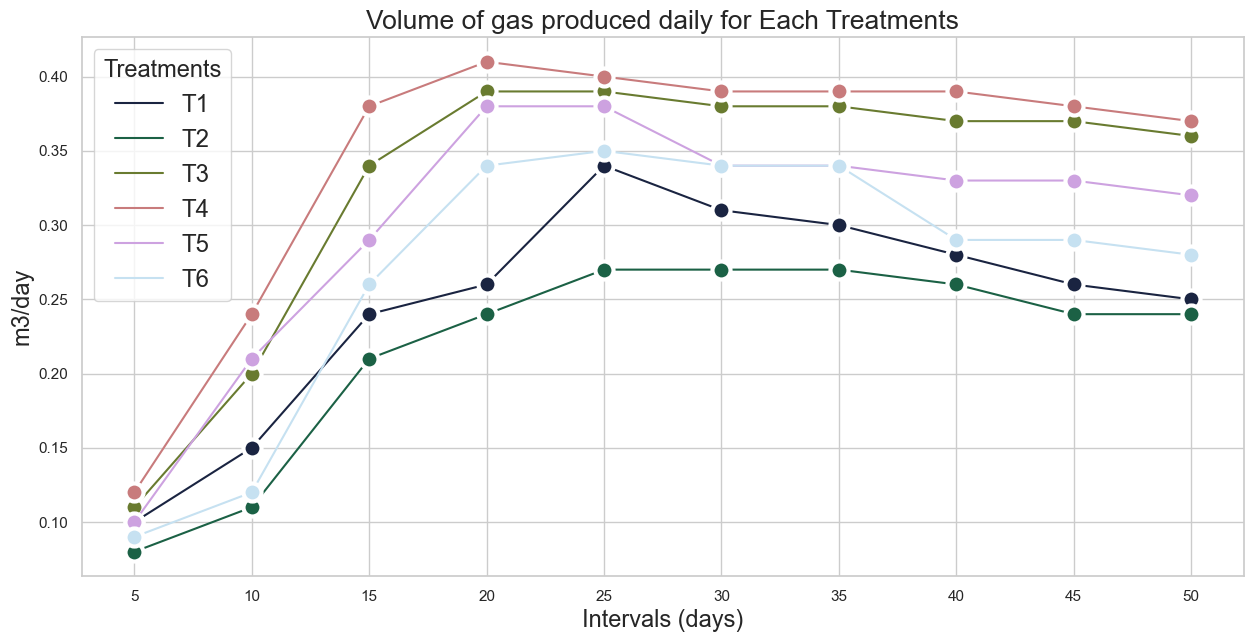

In [183]:
data = {
    'Intervals(days)': ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50'],
    'T1': [0.10, 0.15, 0.24, 0.26, 0.34, 0.31, 0.30, 0.28, 0.26, 0.25],
    'T2': [0.08, 0.11, 0.21, 0.24, 0.27, 0.27, 0.27, 0.26, 0.24, 0.24],
    'T3': [0.11, 0.20, 0.34, 0.39, 0.39, 0.38, 0.38, 0.37, 0.37, 0.36],
    'T4': [0.12, 0.24, 0.38, 0.41, 0.40, 0.39, 0.39, 0.39, 0.38, 0.37],
    'T5': [0.10, 0.21, 0.29, 0.38, 0.38, 0.34, 0.34, 0.33, 0.33, 0.32],
    'T6': [0.09, 0.12, 0.26, 0.34, 0.35, 0.34, 0.34, 0.29, 0.29, 0.28],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create line chart
plt.figure(figsize=(15, 7))
sns.lineplot(x='Intervals(days)',
             y='value', 
             hue='variable', 
             data=pd.melt(df, id_vars='Intervals(days)'), 
             marker='o', 
             markersize=13, 
             markeredgewidth=3, 
             palette='cubehelix'
            )
plt.title('Volume of gas produced daily for Each Treatments', size=19)
plt.xlabel('Intervals (days)', size=17)
plt.ylabel('m3/day', size=17)
plt.legend(title='Treatments', fontsize='x-large', title_fontsize='17')

plt.savefig('daily_volume_of_gas_produced.png', dpi=450)
plt.show()

## Slurry Production

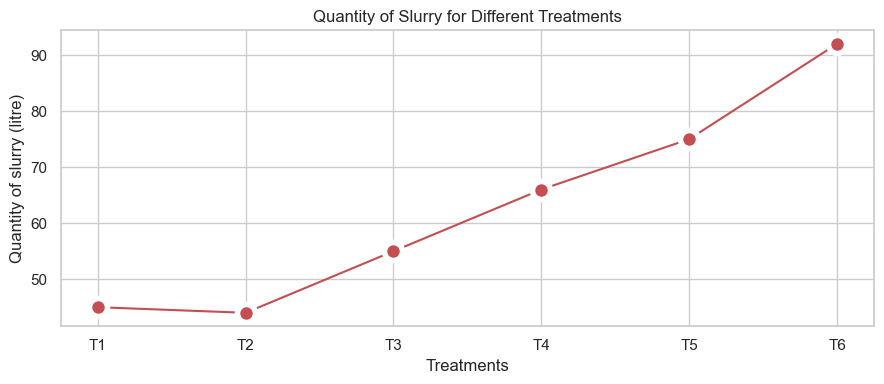

In [194]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Quantity of slurry (litre)': [45, 44, 55, 66, 75, 92]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create line chart
plt.figure(figsize=(9, 4))
sns.lineplot(x='Treatments', y='Quantity of slurry (litre)', data=df, marker='o', markersize=13, markeredgewidth=4, color=colors[3])
plt.title('Quantity of Slurry for Different Treatments')
plt.xlabel('Treatments')
plt.ylabel('Quantity of slurry (litre)')
plt.tight_layout()
plt.savefig('slurry_qty.png', dpi=450)
plt.show()

## Daily slurry generation

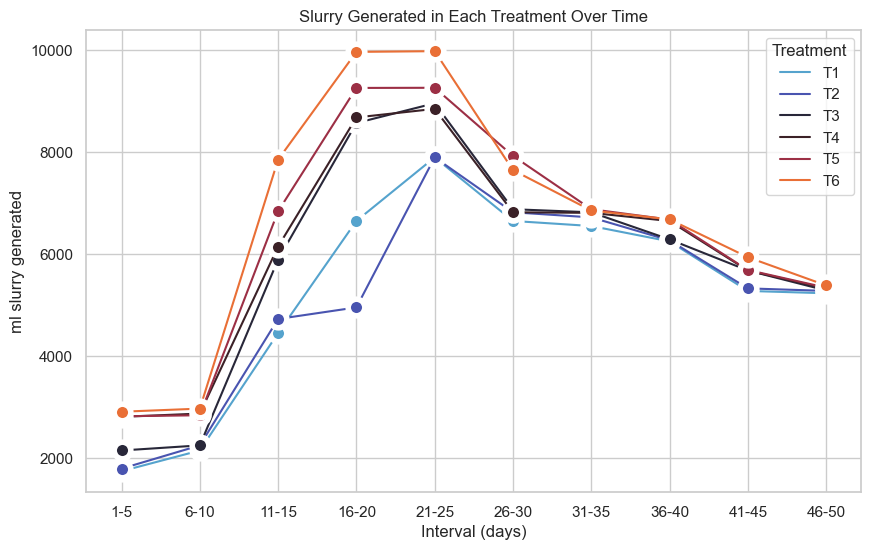

In [201]:
data = {
    'Interval (days)': ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50'],
    'T1': [1750, 2155, 4455, 6651, 7895, 6650, 6551, 6250, 5280, 5234],
    'T2': [1799, 2255, 4731, 4957, 7895, 6820, 6720, 6270, 5330, 5280],
    'T3': [2155, 2255, 5895, 8568, 8955, 6880, 6819, 6289, 5680, 5290],
    'T4': [2814, 2878, 6149, 8677, 8845, 6820, 6809, 6649, 5680, 5329],
    'T5': [2825, 2845, 6840, 9255, 9258, 7924, 6880, 6677, 5690, 5344],
    'T6': [2914, 2975, 7851, 9961, 9975, 7645, 6855, 6681, 5940, 5388]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Interval (days)', 
             y='value', hue='variable', 
             data=pd.melt(df, id_vars=['Interval (days)']),
             marker = 'o', 
             markersize=12,
             markeredgewidth=4, 
             palette='icefire'
            )
plt.title('Slurry Generated in Each Treatment Over Time')
plt.xlabel('Interval (days)')
plt.ylabel('ml slurry generated')
plt.legend(title='Treatment')
plt.savefig('slurry_generation_over_time.png', dpi=450)
plt.show()

## pH and TS

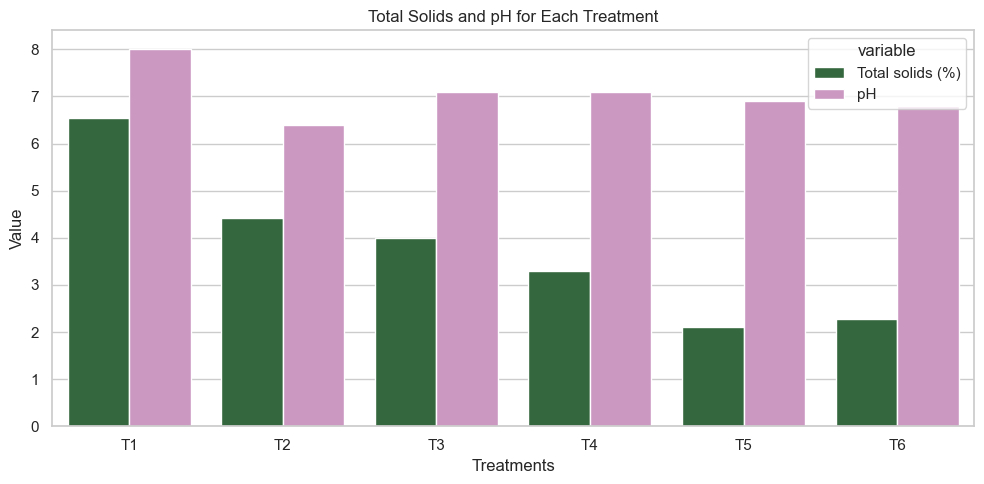

In [205]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Total solids (%)': [6.55, 4.42, 3.99, 3.30, 2.10, 2.27],
    'pH': [8.0, 6.4, 7.1, 7.1, 6.9, 6.8]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Treatments', 
            y='value', hue='variable', 
            data=pd.melt(df, id_vars=['Treatments']),
            palette='cubehelix'
           )
plt.title('Total Solids and pH for Each Treatment')
plt.xlabel('Treatments')
plt.ylabel('Value')
plt.tight_layout()
plt.savefig('ts_pH.png', dpi=450)
plt.show()

## Slurry | Organic carbon | C/N ratio

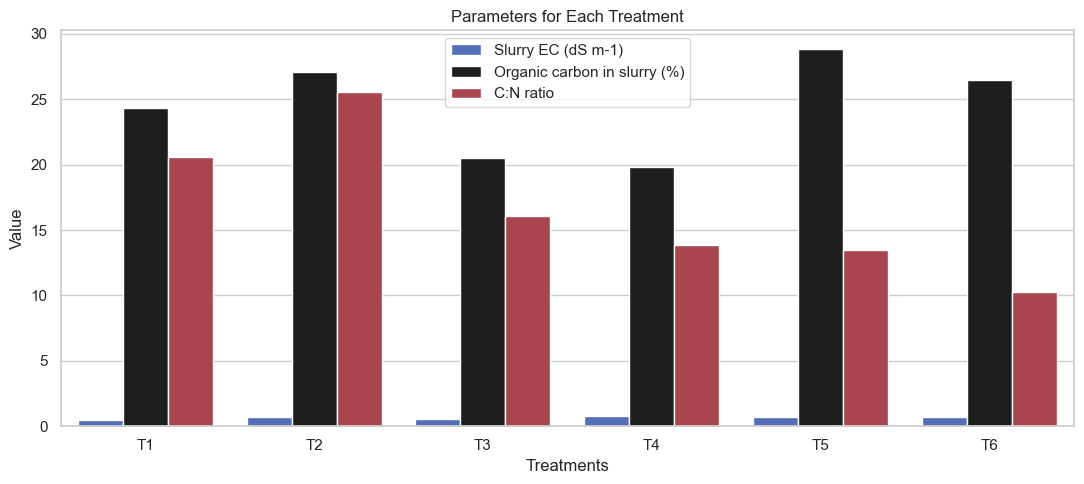

In [214]:
# Sample data
data = {
    'Treatments': ['T1', 'T2', 'T3', 'T4', 'T5', 'T6'],
    'Slurry EC (dS m-1)': [0.51, 0.70, 0.56, 0.79, 0.73, 0.73],
    'Organic carbon in slurry (%)': [24.36, 27.09, 20.54, 19.84, 28.83, 26.48],
    'C:N ratio': [20.58, 25.55, 16.04, 13.84, 13.46, 10.26]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the style
sns.set(style="whitegrid")

# Create bar chart
plt.figure(figsize=(11, 5))
sns.barplot(x='Treatments', y='value', hue='variable', data=pd.melt(df, id_vars=['Treatments']),
           palette='icefire')
plt.title('Parameters for Each Treatment')
plt.xlabel('Treatments')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.savefig('each_treatment.png', dpi=450)
plt.show()